<a href="https://colab.research.google.com/github/nagendraerruboyana/Delhivery-Logistics-Data-Analysis/blob/main/Delhivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Delhivery**

Delhivery is India's largest and fastest-growing fully integrated logistics services provider, known for its comprehensive suite of services that include parcel transportation, warehousing, freight, and supply chain solutions. Founded in 2011, Delhivery aims to build the operating system for commerce by combining world-class infrastructure, high-quality logistics operations, and cutting-edge engineering and technology capabilities. In Fiscal 2021, Delhivery became the largest player in its sector by revenue, leveraging data-driven insights and robust operational capabilities to outperform competitors in quality, efficiency, and profitability.

### Purpose of Analysis

The purpose of this analysis is to understand and process the data from Delhivery's data engineering pipelines to extract valuable insights. By cleaning, sanitizing, and manipulating the raw data, we aim to generate useful features that will assist the data science team in building accurate forecasting models. This analysis will help improve the quality, efficiency, and profitability of Delhivery's logistics operations by providing a deeper understanding of the delivery process, identifying areas for improvement, and enabling data-driven decision-making.

### Objectives

The objectives of this analysis are to:

1. **Clean and Prepare Data**: Handle missing values, sanitize, and manipulate raw data to make it suitable for analysis.
2. **Aggregate and Analyze Data**: Combine delivery details into comprehensive records to understand trip-level metrics.
3. **Feature Engineering**: Create new features from existing data, such as extracting components from names and calculating trip durations.
4. **Outlier Detection and Treatment**: Identify and handle outliers to ensure data quality and reliability.
5. **Model Preparation**: Encode categorical variables and normalize numerical features to prepare the data for predictive modeling.
6. **Hypothesis Testing and Visual Analysis**: Compare various metrics to gain insights into the efficiency and accuracy of delivery operations.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [ ]:
delhivery=pd.read_csv('/content/drive/MyDrive/Data sets/delhivery_data.csv')
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [ ]:
delhivery.shape

(144867, 24)

In [ ]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [ ]:
delhivery.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

### Data Overview

The dataset consists of **144,867 rows** and **24 columns**. The columns include a mix of data types.

### Summary of Observations:

1. **Shape of the Dataset**:
   - The dataset has 144,867 rows and 24 columns, indicating a substantial amount of data for analysis.

2. **Data Types**:
   - The data types vary across the columns:
     - **Object**: 12 columns
     - **Float64**: 10 columns
     - **Int64**: 1 column
     - **Bool**: 1 column

3. **Non-null Count**:
   - The majority of the columns have 144,867 non-null entries.
   - **Missing Values**:
     - `source_name`: 144,574 non-null entries (293 missing values)
     - `destination_name`: 144,606 non-null entries (261 missing values)


### Column Descriptions

Here’s a brief description of each column in the dataset:

1. **data**: Indicates whether the row belongs to the training or test set.
2. **trip_creation_time**: Timestamp of trip creation.
3. **route_schedule_uuid**: Unique ID for a particular route schedule.
4. **route_type**: Type of transportation (e.g., Full Truck Load (FTL) or Carting).
5. **trip_uuid**: Unique ID given to a particular trip, which may include different source and destination centers.
6. **source_center**: ID of the trip’s origin center.
7. **source_name**: Name of the trip’s origin center.
8. **destination_center**: ID of the trip’s destination center.
9. **destination_name**: Name of the trip’s destination center.
10. **od_start_time**: Timestamp of when the trip started.
11. **od_end_time**: Timestamp of when the trip ended.
12. **start_scan_to_end_scan**: Time taken to deliver from source to destination.
13. **is_cutoff**: Boolean indicating if the trip was cut off at any point.
14. **cutoff_factor**: Unknown field related to cutoff.
15. **cutoff_timestamp**: Timestamp related to the cutoff.
16. **actual_distance_to_destination**: Distance in kilometers between source and destination warehouses.
17. **actual_time**: Actual time taken to complete the delivery (cumulative).
18. **osrm_time**: Time calculated by the Open Source Routing Machine (OSRM) engine, based on the shortest path and usual traffic conditions (cumulative).
19. **osrm_distance**: Distance calculated by the OSRM engine, based on the shortest path and usual traffic conditions (cumulative).
20. **factor**: Unknown field.
21. **segment_actual_time**: Time taken for a segment of the package delivery.
22. **segment_osrm_time**: OSRM-calculated time for a segment of the package delivery.
23. **segment_osrm_distance**: OSRM-calculated distance for a segment of the package delivery.
24. **segment_factor**: Unknown field.

The next steps involve detailed data cleaning, focusing on handling missing values and type conversion, to prepare the data for advanced analysis.

In [ ]:
delhivery['trip_uuid'].nunique()

14817

In [ ]:
delhivery.loc[(delhivery['source_name'].isnull()) | (delhivery['destination_name'].isnull()),'trip_uuid'].nunique()

110

In [ ]:
(delhivery.loc[(delhivery['source_name'].isnull()) | (delhivery['destination_name'].isnull()),'trip_uuid'].nunique()/delhivery['trip_uuid'].nunique())*100

0.7423904974016332

### Data Cleaning Process

In the initial stages of preparing our dataset for deeper analysis, two primary steps were taken to enhance the integrity and utility of the data:

1. **Handling Missing Values**:
   - Our analysis revealed that only 0.74% of the trips (`trip_uuid`) have missing values in either the `source_name` or `destination_name` fields. Considering the low percentage, these records with missing values were removed from the dataset.

2. **Converting Data Types**:
   - The `trip_creation_time`,`od_start_time`,`od_end_time` and `cutoff_timestamp` fields were initially in object format, which is not optimal for datetime operations. To facilitate easier manipulation and enable more accurate time-based analysis, these fields have been converted to the `datetime64[ns]` format. This conversion standardizes the datetime data, allowing for more efficient and precise computations, such as calculating durations and setting time-based conditions in later stages of the analysis.

In [ ]:
delhivery.dropna(how='any', inplace=True)
delhivery=delhivery.reset_index(drop=True)

delhivery.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [ ]:
def converting_to_datetime(data,column_names):
    for col in date_column_names:
        data[col]=pd.to_datetime(data[col], format='mixed')

In [ ]:
date_column_names=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp']

converting_to_datetime(data=delhivery,column_names=date_column_names)

In [ ]:
delhivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144316 entries, 0 to 144315
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144316 non-null  object        
 1   trip_creation_time              144316 non-null  datetime64[ns]
 2   route_schedule_uuid             144316 non-null  object        
 3   route_type                      144316 non-null  object        
 4   trip_uuid                       144316 non-null  object        
 5   source_center                   144316 non-null  object        
 6   source_name                     144316 non-null  object        
 7   destination_center              144316 non-null  object        
 8   destination_name                144316 non-null  object        
 9   od_start_time                   144316 non-null  datetime64[ns]
 10  od_end_time                     144316 non-null  datetim

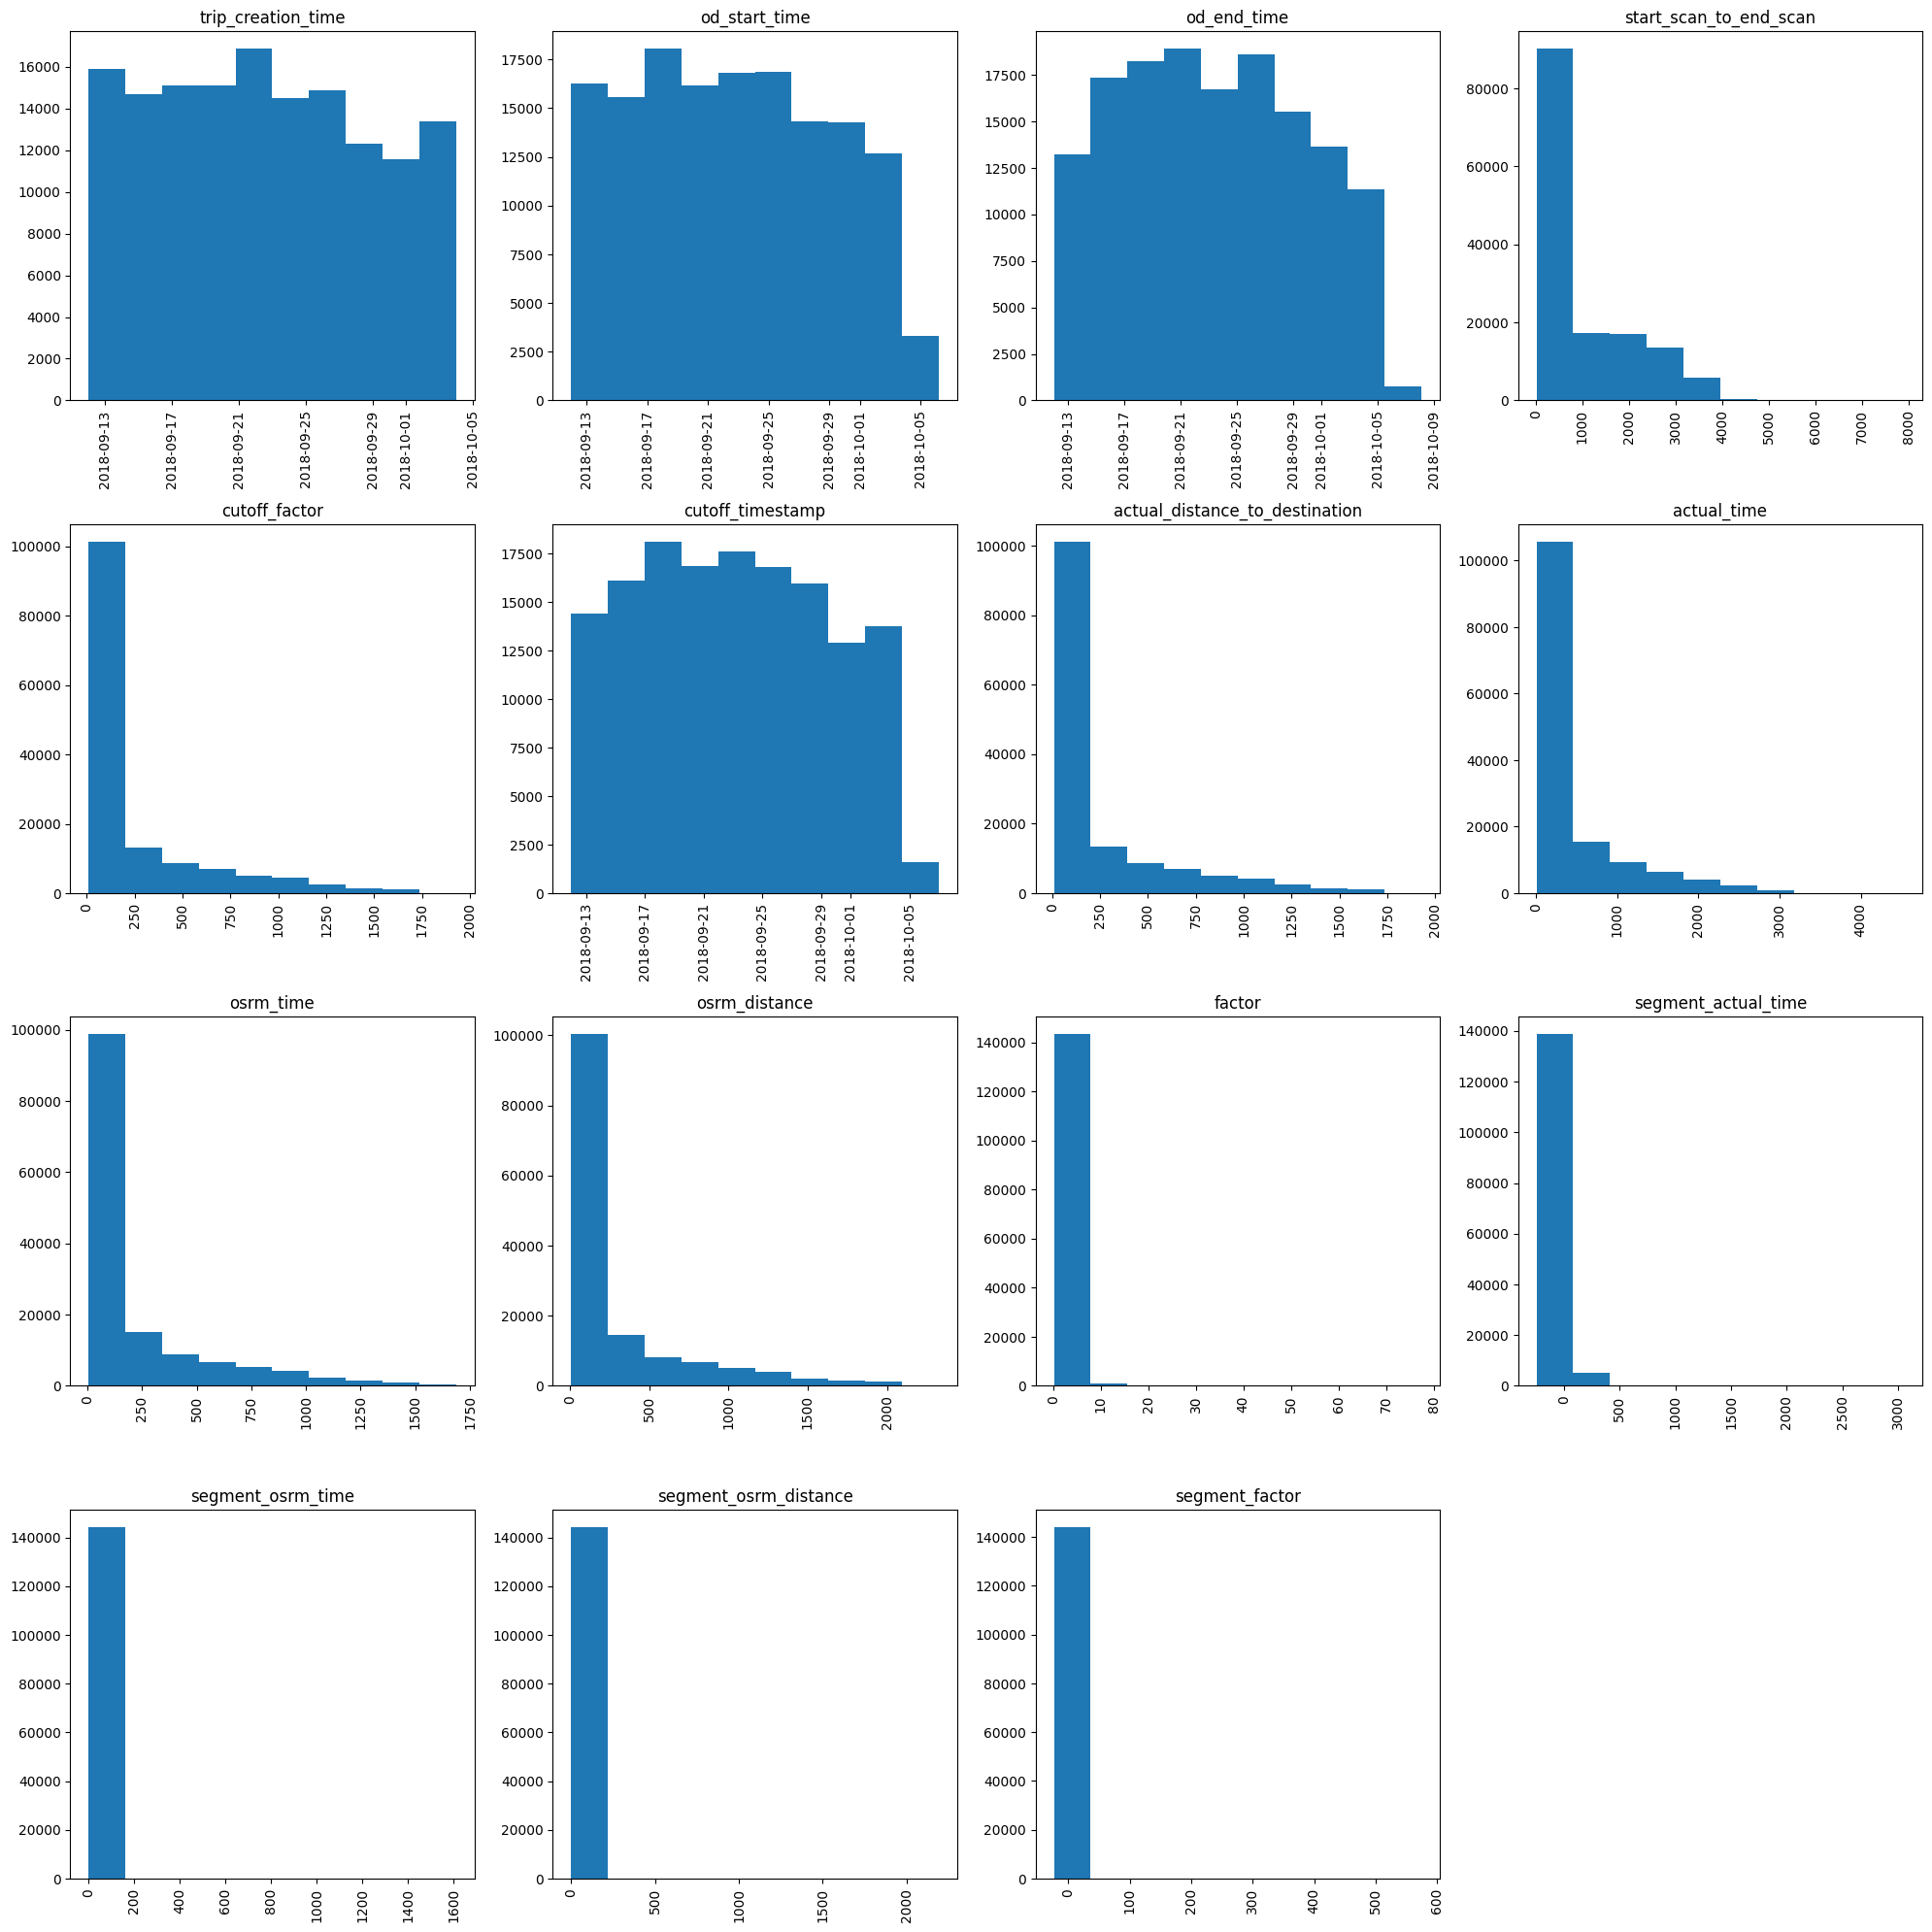

In [ ]:
delhivery.hist(figsize=(20,20), xrot=90, grid=False)

plt.tight_layout()

plt.show()

### Unique Values in the Dataset

To better understand the dataset, we examined the unique values in each column. This helps identify the nature of the data, such as categorical versus continuous variables, and the diversity within each column. Below is the summary of unique values for each column:

In [ ]:
def unique_values_counts(data):
    for _ in data.columns:
        if data[_].nunique() < 20:
            print(f"{_} unique values : {data[_].unique()}")
            print(f"{_} count of unique values : {data[_].nunique()}\n")
        else:
            print(f"{_} count of unique values : {data[_].nunique()}\n")

In [ ]:
unique_values_counts(data=delhivery)

data unique values : ['training' 'test']
data count of unique values : 2

trip_creation_time count of unique values : 14787

route_schedule_uuid count of unique values : 1497

route_type unique values : ['Carting' 'FTL']
route_type count of unique values : 2

trip_uuid count of unique values : 14787

source_center count of unique values : 1496

source_name count of unique values : 1496

destination_center count of unique values : 1466

destination_name count of unique values : 1466

od_start_time count of unique values : 26223

od_end_time count of unique values : 26223

start_scan_to_end_scan count of unique values : 1914

is_cutoff unique values : [ True False]
is_cutoff count of unique values : 2

cutoff_factor count of unique values : 501

cutoff_timestamp count of unique values : 92894

actual_distance_to_destination count of unique values : 143965

actual_time count of unique values : 3182

osrm_time count of unique values : 1531

osrm_distance count of unique values : 137544

fa

In [ ]:
delhivery.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,9,2018-09-20 04:27:55.000000,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,18,2018-09-20 04:17:55.000000,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,27,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,True,36,2018-09-20 03:39:57.000000,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,False,39,2018-09-20 03:33:55.000000,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


### Data Aggregation to Segment Level

In this dataset, each `trip_uuid` may have multiple records, representing various checkpoints along the route from the source to the destination. To simplify the analysis and convert the data to a segment level (from source to destination with possible intermediate hubs), we aggregate the data. The aggregation consolidates the checkpoints' distances and times, providing a comprehensive view of each trip from start to finish.

In [ ]:
delhivery_segment_level=delhivery.groupby(['trip_uuid','source_center','destination_center']).agg(source_name=('source_name','first'),
                                                                          destination_name=('destination_name','first'),
                                                                          route_type=('route_type','first'),
                                                                          route_schedule_uuid=('route_schedule_uuid','first'),
                                                                          trip_creation_time=('trip_creation_time','first'),
                                                                          data=('data','first'),
                                                                          od_start_time=('od_start_time','first'),
                                                                          od_end_time=('od_end_time','last'),
                                                                          start_scan_to_end_scan=('start_scan_to_end_scan','first'),
                                                                          actual_distance_to_destination=('actual_distance_to_destination','last'),
                                                                          actual_time=('actual_time','last'),
                                                                          osrm_time=('osrm_time','last'),
                                                                          osrm_distance=('osrm_distance','last'),
                                                                          segment_actual_time=('segment_actual_time','sum'),
                                                                          segment_osrm_time=('segment_osrm_time','sum'),
                                                                          segment_osrm_distance=('segment_osrm_distance','sum'))

### Explanation of the Aggregation Process

1. **Grouping**:
   - The data is grouped by `trip_uuid`, `source_center`, and `destination_center`, consolidating all the records related to a particular trip and its checkpoints.

2. **Aggregation Functions**:
   - **`source_name`**: The first occurrence is taken as it represents the starting point of the trip.
   - **`destination_name`**: The first occurrence is used as it represents the final destination of the trip.
   - **`route_type`**: The first occurrence is taken as the route type generally remains consistent throughout the trip.
   - **`route_schedule_uuid`**: The first occurrence is taken since the route schedule ID typically does not change.
   - **`trip_creation_time`**: The first occurrence is used to capture the initial creation time of the trip.
   - **`data`**: The first occurrence is taken to maintain the distinction between training and test data.
   - **`od_start_time`**: The first occurrence is used to mark the starting time of the trip.
   - **`od_end_time`**: The last occurrence is used to capture the final endpoint of the trip.
   - **`start_scan_to_end_scan`**: The first occurrence is used to capture the overall scan time for the entire trip.
   - **`actual_distance_to_destination`**: The last occurrence is used to capture the final calculated distance.
   - **`actual_time`**: The last occurrence is used to capture the total time taken for the trip.
   - **`osrm_time`**: The last occurrence is used to capture the final calculated time by OSRM.
   - **`osrm_distance`**: The last occurrence is used to capture the final calculated distance by OSRM.
   - **`segment_actual_time`**: The sum is taken to aggregate the time across all segments.
   - **`segment_osrm_time`**: The sum is taken to aggregate the OSRM-calculated time across all segments.
   - **`segment_osrm_distance`**: The sum is taken to aggregate the OSRM-calculated distance across all segments.

By performing this aggregation, we convert the data into a segment level format, which simplifies the dataset and makes it more suitable for analysis. This step ensures that we have a clear view of each trip's total time and distance, from the source to the destination, incorporating all intermediate checkpoints.

In [ ]:
delhivery_segment_level=delhivery_segment_level.reset_index()
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
1,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
2,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
3,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
4,trip-153671043369099517,IND000000ACB,IND160002AAC,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408


In [ ]:
delhivery_segment_level=delhivery_segment_level.sort_values(by=['trip_uuid','od_end_time'], ascending=True).reset_index(drop=True)
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-12 00:00:33.691250,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270


### Feature Extraction

To facilitate the identification of patterns, insights, and actionable recommendations crucial for optimizing logistics operations, several new features were extracted from the existing dataset. These features aim to enrich the data with additional context and temporal information, making it more suitable for building accurate forecasting models.

#### 1. **od_time_diff**
   - This feature calculates the total time taken for a trip from the start to the end by computing the difference between `od_end_time` and `od_start_time` and converting it into minutes.

#### 2. **source_state and destination_state**
   - These features extract the state information from `source_name` and `destination_name` by splitting the name string at the parentheses and selecting the state information.

#### 3. **source_city and destination_city**
   - These features extract the city names from `source_name` and `destination_name` by splitting the name string at underscores and spaces to isolate the city name.

#### 4. **source_place and destination_place**
   - These features identify specific places or hubs from `source_name` and `destination_name` by further splitting the name strings and applying conditional logic to isolate the place information.

#### 5. **source_code and destination_code**
   - These features extract any codes present in `source_name` and `destination_name` by splitting the name strings and applying conditional logic to identify and extract code elements.

#### 6. **trip_creation_year, trip_creation_month, and trip_creation_day**
   - These temporal features extract the year, month, and day from `trip_creation_time` by converting the `trip_creation_time` into its respective components.

These additional features enrich the dataset, making it more informative and useful for building predictive models and conducting detailed analysis, ultimately aiding in the optimization of Delhivery's logistics operations.

In [ ]:
delhivery_segment_level['od_time_diff']=np.round((delhivery_segment_level['od_end_time']-delhivery_segment_level['od_start_time']).dt.total_seconds()/(60),2)
delhivery_segment_level.drop(columns=['od_start_time'],inplace=True)
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72


In [ ]:
#'Bhopal_Trnsport_H (Madhya Pradesh)'.split('(') ---->> x.split('(')
# >> ['Bhopal_Trnsport_H ', 'Madhya Pradesh)']

#>> ['Bhopal_Trnsport_H ', 'Madhya Pradesh)'][-1][:-1] ---->> x.split('(')[-1][:-1]
# >> Madhya Pradesh

delhivery_segment_level['source_state']=delhivery_segment_level['source_name'].apply(lambda x:x.split('(')[-1][:-1])
delhivery_segment_level['destination_state']=delhivery_segment_level['destination_name'].apply(lambda x:x.split('(')[-1][:-1])
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,source_state,destination_state
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51,Madhya Pradesh,Uttar Pradesh
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60,Uttar Pradesh,Haryana
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78,Karnataka,Karnataka
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83,Karnataka,Karnataka
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72,Karnataka,Haryana


In [ ]:
def city(x):
    y=x.split('(')[0] #'Bhopal_Trnsport_H (Madhya Pradesh)'.split('(') >> ['Bhopal_Trnsport_H ', 'Madhya Pradesh)'] >> 'Bhopal_Trnsport_H '
    y=y.split('_')[0] # 'Bhopal_Trnsport_H '.split('_') >> ['Bhopal', 'Trnsport', 'H '] >> 'Bhopal'
    return y.split(' ')[0] # checking edge cases like 'Mumbai Hub'.split(' ') >>  ['Mumbai',  'Hub'] >> 'Mumbai'

In [ ]:
delhivery_segment_level['source_city']=delhivery_segment_level['source_name'].apply(city)
delhivery_segment_level['destination_city']=delhivery_segment_level['destination_name'].apply(city)
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,source_state,destination_state,source_city,destination_city
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51,Madhya Pradesh,Uttar Pradesh,Bhopal,Kanpur
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60,Uttar Pradesh,Haryana,Kanpur,Gurgaon
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78,Karnataka,Karnataka,Tumkur,Doddablpur
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83,Karnataka,Karnataka,Doddablpur,Chikblapur
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72,Karnataka,Haryana,Bangalore,Gurgaon


In [ ]:
delhivery_segment_level.loc[delhivery_segment_level['destination_city'].str.len()<=3,'destination_city'].unique()

array(['HBR', 'PNQ', 'FBD', 'MAA', 'Una', 'GZB', 'Goa', 'BLR', 'GGN',
       'Pen', 'CCU', 'AMD', 'KN', 'NOI', 'OK', 'Del', 'Amd', 'Hyd', 'Wai',
       'Mau', 'Cjb'], dtype=object)

In [ ]:
delhivery_segment_level.loc[delhivery_segment_level['source_city'].str.len()<=3,'source_city'].unique()

array(['HBR', 'FBD', 'CCU', 'Una', 'Goa', 'MAA', 'BOM', 'Pen', 'AMD',
       'BLR', 'PNQ', 'NOI', 'OK', 'Del', 'GZB', 'Hyd', 'Wai', 'GGN',
       'Cjb', 'Amd', 'Mau', 'Blr', 'Amb'], dtype=object)

In [ ]:
city_abbreviations = {
    'HBR': 'Bangalore',
    'PNQ': 'Pune',
    'FBD': 'Faridabad',
    'MAA': 'Chennai',
    'Una': 'Una',
    'GZB': 'Ghaziabad',
    'Goa': 'Goa',
    'BLR': 'Bangalore',
    'GGN': 'Gurgaon',
    'Pen': 'Pen',
    'CCU': 'Kolkata',
    'AMD': 'Ahmedabad',
    'KN': 'Delhi',
    'NOI': 'Noida',
    'OK': 'Delhi',
    'Del': 'Delhi',
    'Amd': 'Ahmedabad',
    'Hyd': 'Hyderabad',
    'Wai': 'Wai',
    'Mau': 'Mau',
    'Cjb': 'Coimbatore',
    'BOM': 'Mumbai',
    'Blr': 'Bangalore',
    'Amb': 'Ambala'
} # Renaming the unique cases

In [ ]:
delhivery_segment_level['destination_city']=delhivery_segment_level['destination_city'].map(city_abbreviations).fillna(delhivery_segment_level['destination_city'])
delhivery_segment_level['source_city']=delhivery_segment_level['source_city'].map(city_abbreviations).fillna(delhivery_segment_level['source_city'])
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,source_state,destination_state,source_city,destination_city
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51,Madhya Pradesh,Uttar Pradesh,Bhopal,Kanpur
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60,Uttar Pradesh,Haryana,Kanpur,Gurgaon
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78,Karnataka,Karnataka,Tumkur,Doddablpur
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83,Karnataka,Karnataka,Doddablpur,Chikblapur
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72,Karnataka,Haryana,Bangalore,Gurgaon


In [ ]:
def place(x):
    y=x.split('(')[0] #'Bhopal_Trnsport_H (Madhya Pradesh)'.split('(') >> ['Bhopal_Trnsport_H ', 'Madhya Pradesh)'] >> 'Bhopal_Trnsport_H '
    y=y.split('_') # 'Bhopal_Trnsport_H '.split('_') >> ['Bhopal', 'Trnsport', 'H ']
    if len(y)<=2:
        return y[0]
    elif len(y)==3:
        return y[1]
    elif len(y)==4:
        if len(y[2])>3:
            return y[1]+' '+y[2]
        else:
            return y[1]

In [ ]:
for col in delhivery_segment_level['destination_name'].apply(place).unique():
    if len(col.split(' '))>1:
        print(col)

Hospet 
HBR Layout PC 
PNQ Rahatani DPC 
Faridabad 
Janakpuri 
Palwal 
Mohan Nagar
Sec 02
Bhopal MP Nagar 
Haridwar 
Mumbai Hub 
PNQ Pashan DPC 
Lake Avenue
Kalyan West 
New Alipore
Erode 
Jaipur 
Nalasopara 
PNQ Vadgaon Sheri DPC 
Panipat 
Dehradun 
Ganga Nagar
Aurangabad 
Meerut 
Rohtak 
Patiala 
Darbhanga 
Bidar 
Pilani 
Panaji Goa 
Khar West 
Pune Balaji Nagar 
Vadodara 
Shillong 
Central Goa 
Salem 
Mumbai Antop Hill 
North Delhi 
Udupi 
Vijayawada 
Bareilly 
Karnal 
HSR Layout
Agra 
Vishakhapatnam 
Chandigarh 
Jabalpur 
 Kothanur
Bhandup West
Varanasi 


In [ ]:
for col in delhivery_segment_level['source_name'].apply(place).unique():
    if len(col.split(' '))>1:
        print(col)

Mumbai Hub 
Hospet 
HBR Layout PC 
Palwal 
Bhopal MP Nagar 
Haridwar 
Karur 
PNQ Pashan DPC 
Janakpuri 
Salem 
Tiruchi 
Sec 02
PNQ Vadgaon Sheri DPC 
Faridabad 
Panipat 
Dehradun 
Bhiwadi DC 
Ganga Nagar
Meerut 
Rohtak 
Darbhanga 
Ambala 
Bidar 
Mumbai Antop Hill 
Panaji Goa 
Mohan Nagar
Kalyan West 
Jaipur 
Pune Balaji Nagar 
Vadodara 
Shillong 
Udupi 
Patiala 
New Alipore
Lake Avenue
Chandigarh 
Erode 
Karnal 
Vijayawada 
Pilani 
Airport 
PNQ Rahatani DPC 
Jabalpur 
Vizag 
Mumbai Mahim 
Hathras 
 Kothanur
Bareilly 
Central Goa 


In [ ]:
delhivery_segment_level['source_place']=delhivery_segment_level['source_name'].apply(place)
delhivery_segment_level['destination_place']=delhivery_segment_level['destination_name'].apply(place)
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,source_state,destination_state,source_city,destination_city,source_place,destination_place
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51,Madhya Pradesh,Uttar Pradesh,Bhopal,Kanpur,Trnsport,Central
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60,Uttar Pradesh,Haryana,Kanpur,Gurgaon,Central,Bilaspur
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78,Karnataka,Karnataka,Tumkur,Doddablpur,Veersagr,ChikaDPP
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83,Karnataka,Karnataka,Doddablpur,Chikblapur,ChikaDPP,ShntiSgr
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72,Karnataka,Haryana,Bangalore,Gurgaon,Nelmngla,Bilaspur


In [ ]:
place_names_dict = {
    "HBR Layout PC ": "HBR Layout",
    "Bhopal MP Nagar ": "MP Nagar",
    "PNQ Pashan DPC ": "Pashan",
    "PNQ Vadgaon Sheri DPC ": "Vadgaon Sheri",
    "Bhiwadi DC ": "Bhiwadi",
    "Mumbai Antop Hill ": "Antop Hill",
    "Pune Balaji Nagar ": "Balaji Nagar",
    "PNQ Rahatani DPC ": "Rahatani",
    "Mumbai Mahim ": "Mahim"
} # Renaming the edge cases

In [ ]:
delhivery_segment_level['source_place']=delhivery_segment_level['source_place'].map(place_names_dict).fillna(delhivery_segment_level['source_place'])
delhivery_segment_level['destination_place']=delhivery_segment_level['destination_place'].map(place_names_dict).fillna(delhivery_segment_level['destination_place'])
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,source_state,destination_state,source_city,destination_city,source_place,destination_place
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51,Madhya Pradesh,Uttar Pradesh,Bhopal,Kanpur,Trnsport,Central
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60,Uttar Pradesh,Haryana,Kanpur,Gurgaon,Central,Bilaspur
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78,Karnataka,Karnataka,Tumkur,Doddablpur,Veersagr,ChikaDPP
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83,Karnataka,Karnataka,Doddablpur,Chikblapur,ChikaDPP,ShntiSgr
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72,Karnataka,Haryana,Bangalore,Gurgaon,Nelmngla,Bilaspur


In [ ]:
def code(x):
    y=x.split('(')[0] #'Bhopal_Trnsport_H (Madhya Pradesh)'.split('(') >> ['Bhopal_Trnsport_H ', 'Madhya Pradesh)'] >> 'Bhopal_Trnsport_H '
    y=y.split('_')  # 'Bhopal_Trnsport_H '.split('_') >> ['Bhopal', 'Trnsport', 'H ']
    if len(y)==1:
        return 'No code'
    elif len(y)==2:
        if len(y[-1])>3:
            return 'No code'
        else:
            return y[-1]
    elif len(y)==3:
        if len(y[-1])>3:
            return 'No code'
        else:
            return y[-1]
    elif len(y)==4:
        if len(y[-2])>3:
            return y[-1]
        else:
            return y[-2]+' '+y[-1]

In [ ]:
delhivery_segment_level['source_code']=delhivery_segment_level['source_name'].apply(code)
delhivery_segment_level['destination_code']=delhivery_segment_level['destination_name'].apply(code)
delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,source_state,destination_state,source_city,destination_city,source_place,destination_place,source_code,destination_code
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51,Madhya Pradesh,Uttar Pradesh,Bhopal,Kanpur,Trnsport,Central,H,H 6
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60,Uttar Pradesh,Haryana,Kanpur,Gurgaon,Central,Bilaspur,H 6,HB
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78,Karnataka,Karnataka,Tumkur,Doddablpur,Veersagr,ChikaDPP,I,D
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83,Karnataka,Karnataka,Doddablpur,Chikblapur,ChikaDPP,ShntiSgr,D,D
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72,Karnataka,Haryana,Bangalore,Gurgaon,Nelmngla,Bilaspur,H,HB


In [ ]:
delhivery_segment_level['trip_creation_year']=delhivery_segment_level['trip_creation_time'].dt.year
delhivery_segment_level['trip_creation_month']=delhivery_segment_level['trip_creation_time'].dt.month
delhivery_segment_level['trip_creation_day']=delhivery_segment_level['trip_creation_time'].dt.day

delhivery_segment_level.head()

,trip_uuid,source_center,destination_center,source_name,destination_name,route_type,route_schedule_uuid,trip_creation_time,data,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,od_time_diff,source_state,destination_state,source_city,destination_city,source_place,destination_place,source_code,destination_code,trip_creation_year,trip_creation_month,trip_creation_day
0,trip-153671041653548748,IND462022AAA,IND209304AAA,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,999.51,Madhya Pradesh,Uttar Pradesh,Bhopal,Kanpur,Trnsport,Central,H,H 6,2018,9,12
1,trip-153671041653548748,IND209304AAA,IND000000ACB,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,2018-09-12 00:00:16.535741,training,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,1260.60,Uttar Pradesh,Haryana,Kanpur,Gurgaon,Central,Bilaspur,H 6,HB,2018,9,12
2,trip-153671042288605164,IND572101AAA,IND561203AAB,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,122.78,Karnataka,Karnataka,Tumkur,Doddablpur,Veersagr,ChikaDPP,I,D,2018,9,12
3,trip-153671042288605164,IND561203AAB,IND562101AAA,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),Carting,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,2018-09-12 00:00:22.886430,training,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,58.83,Karnataka,Karnataka,Doddablpur,Chikblapur,ChikaDPP,ShntiSgr,D,D,2018,9,12
4,trip-153671043369099517,IND562132AAA,IND000000ACB,Bangalore_Nelmngla_H (Karnataka),Gurgaon_Bilaspur_HB (Haryana),FTL,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,2018-09-12 00:00:33.691250,training,2018-09-14 03:40:17.106733,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,3099.72,Karnataka,Haryana,Bangalore,Gurgaon,Nelmngla,Bilaspur,H,HB,2018,9,12


In [ ]:
delhivery.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
delhivery_segment_level=delhivery_segment_level[['data', 'trip_creation_time', 'trip_creation_year', 'trip_creation_month', 'trip_creation_day', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'source_state', 'source_city', 'source_place', 'source_code', 'destination_center',
       'destination_name', 'destination_state', 'destination_city', 'destination_place', 'destination_code', 'od_end_time', 'od_time_diff',
       'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']]

delhivery_segment_level.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_state,source_city,source_place,source_code,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,od_end_time,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,2018,9,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Madhya Pradesh,Bhopal,Trnsport,H,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Uttar Pradesh,Kanpur,Central,H 6,2018-09-12 16:39:46.858469,999.51,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528
1,training,2018-09-12 00:00:16.535741,2018,9,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),Uttar Pradesh,Kanpur,Central,H 6,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur,HB,2018-09-13 13:40:23.123744,1260.60,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205
2,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur,Veersagr,I,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Karnataka,Doddablpur,ChikaDPP,D,2018-09-12 02:03:09.655591,122.78,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899
3,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),Karnataka,Doddablpur,ChikaDPP,D,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D,2018-09-12 03:01:59.598855,58.83,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995
4,training,2018-09-12 00:00:33.691250,2018,9,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Karnataka,Bangalore,Nelmngla,H,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur,HB,2018-09-14 03:40:17.106733,3099.72,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270


In [ ]:
delhivery_segment_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26222 entries, 0 to 26221
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            26222 non-null  object        
 1   trip_creation_time              26222 non-null  datetime64[ns]
 2   trip_creation_year              26222 non-null  int32         
 3   trip_creation_month             26222 non-null  int32         
 4   trip_creation_day               26222 non-null  int32         
 5   route_schedule_uuid             26222 non-null  object        
 6   route_type                      26222 non-null  object        
 7   trip_uuid                       26222 non-null  object        
 8   source_center                   26222 non-null  object        
 9   source_name                     26222 non-null  object        
 10  source_state                    26222 non-null  object        
 11  so

### Aggregation to Trip Level

To provide a more comprehensive view of each trip and facilitate deeper analysis, the data is further aggregated to the trip level. This involves combining the segment-level data based on the unique `trip_uuid` and aggregating the necessary fields. This step helps in understanding the entire trip journey from source to destination, including any intermediate segments.

#### Aggregation Approach:

- **Group by** `trip_uuid` to consolidate the data for each unique trip.
- **Aggregate Functions**:
  - **First Value**: For fields where the first occurrence is relevant, such as `source_name`, `trip_creation_time`.
  - **Last Value**: For fields where the last occurrence is relevant, such as `destination_name`, `od_end_time`.
  - **Sum**: For cumulative metrics like `segment_actual_time`, `segment_osrm_time`, and `segment_osrm_distance`.

### Aggregated Features:

1. **Source and Destination Information**:
   - `source_name`: The initial source of the trip.
   - `destination_name`: The final destination of the trip.

2. **Trip Creation and Duration**:
   - `trip_creation_time`: The time when the trip was created.
   - `od_end_time`: The final end time of the trip.
   - `od_time_diff`: Total time taken for the trip from start to end.

3. **Segment Times and Distances**:
   - `segment_actual_time`: Total actual time taken for all segments.
   - `segment_osrm_time`: Total OSRM time for all segments.
   - `segment_osrm_distance`: Total OSRM distance for all segments.

By aggregating the data to the trip level, we create a clear, comprehensive dataset that captures the entire journey of each trip from source to destination. This aggregation facilitates more effective analysis, revealing patterns and insights that are crucial for optimizing logistics operations and improving forecasting models.

In [ ]:
delhivery_trip_level=delhivery_segment_level.groupby(['trip_uuid']).agg(data=('data','first'),
                                                                        trip_creation_time=('trip_creation_time','first'),
                                                                        trip_creation_year=('trip_creation_year','first'),
                                                                        trip_creation_month=('trip_creation_month','first'),
                                                                        trip_creation_day=('trip_creation_day','first'),
                                                                        route_schedule_uuid=('route_schedule_uuid','first'),
                                                                        route_type=('route_type','first'),
                                                                        source_center=('source_center','first'),
                                                                        source_name=('source_name','first'),
                                                                        source_state=('source_state','first'),
                                                                        source_city=('source_city','first'),
                                                                        source_place=('source_place','first'),
                                                                        source_code=('source_code','first'),
                                                                        destination_center=('destination_center','last'),
                                                                        destination_name=('destination_name','last'),
                                                                        destination_state=('destination_state','last'),
                                                                        destination_city=('destination_city','last'),
                                                                        destination_place=('destination_place','last'),
                                                                        destination_code=('destination_code','last'),
                                                                        od_end_time=('od_end_time','last'),
                                                                        od_time_diff=('od_time_diff','sum'),
                                                                        start_scan_to_end_scan=('start_scan_to_end_scan','sum'),
                                                                        actual_distance_to_destination=('actual_distance_to_destination','sum'),
                                                                        actual_time=('actual_time','sum'),
                                                                        osrm_time=('osrm_time','sum'),
                                                                        osrm_distance=('osrm_distance','sum'),
                                                                        segment_actual_time=('segment_actual_time','sum'),
                                                                        segment_osrm_time=('segment_osrm_time','sum'),
                                                                        segment_osrm_distance=('segment_osrm_distance','sum'))

delhivery_trip_level.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,route_schedule_uuid,route_type,source_center,source_name,source_state,source_city,source_place,source_code,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,od_end_time,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
trip_uuid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
trip-153671041653548748,training,2018-09-12 00:00:16.535741,2018,9,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Madhya Pradesh,Bhopal,Trnsport,H,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur,HB,2018-09-13 13:40:23.123744,2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
trip-153671042288605164,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur,Veersagr,I,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D,2018-09-12 03:01:59.598855,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
trip-153671043369099517,training,2018-09-12 00:00:33.691250,2018,9,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Karnataka,Bangalore,Nelmngla,H,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Mehmdpur,H,2018-09-14 17:34:55.442454,3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
trip-153671046011330457,training,2018-09-12 00:01:00.113710,2018,9,12,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Mumbai Hub,No code,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Maharashtra,Mumbai,MiraRd,IP,2018-09-12 01:41:29.809822,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
trip-153671052974046625,training,2018-09-12 00:02:09.740725,2018,9,12,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,2018-09-12 12:00:30.683231,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [ ]:
delhivery_trip_level=delhivery_trip_level.reset_index()
delhivery_trip_level.head()

,trip_uuid,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,route_schedule_uuid,route_type,source_center,source_name,source_state,source_city,source_place,source_code,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,od_end_time,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,trip-153671041653548748,training,2018-09-12 00:00:16.535741,2018,9,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Madhya Pradesh,Bhopal,Trnsport,H,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur,HB,2018-09-13 13:40:23.123744,2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,trip-153671042288605164,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur,Veersagr,I,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D,2018-09-12 03:01:59.598855,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,trip-153671043369099517,training,2018-09-12 00:00:33.691250,2018,9,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Karnataka,Bangalore,Nelmngla,H,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Mehmdpur,H,2018-09-14 17:34:55.442454,3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,trip-153671046011330457,training,2018-09-12 00:01:00.113710,2018,9,12,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Mumbai Hub,No code,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Maharashtra,Mumbai,MiraRd,IP,2018-09-12 01:41:29.809822,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,trip-153671052974046625,training,2018-09-12 00:02:09.740725,2018,9,12,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,2018-09-12 12:00:30.683231,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [ ]:
delhivery_trip_level=delhivery_trip_level[delhivery_segment_level.columns]
delhivery_trip_level.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_state,source_city,source_place,source_code,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,od_end_time,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:16.535741,2018,9,12,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),Madhya Pradesh,Bhopal,Trnsport,H,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),Haryana,Gurgaon,Bilaspur,HB,2018-09-13 13:40:23.123744,2260.11,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733
1,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur,Veersagr,I,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D,2018-09-12 03:01:59.598855,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
2,training,2018-09-12 00:00:33.691250,2018,9,12,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),Karnataka,Bangalore,Nelmngla,H,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),Punjab,Chandigarh,Mehmdpur,H,2018-09-14 17:34:55.442454,3934.36,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678
3,training,2018-09-12 00:01:00.113710,2018,9,12,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Mumbai Hub,No code,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Maharashtra,Mumbai,MiraRd,IP,2018-09-12 01:41:29.809822,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
4,training,2018-09-12 00:02:09.740725,2018,9,12,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,2018-09-12 12:00:30.683231,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919


In [ ]:
delhivery_trip_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14787 entries, 0 to 14786
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            14787 non-null  object        
 1   trip_creation_time              14787 non-null  datetime64[ns]
 2   trip_creation_year              14787 non-null  int32         
 3   trip_creation_month             14787 non-null  int32         
 4   trip_creation_day               14787 non-null  int32         
 5   route_schedule_uuid             14787 non-null  object        
 6   route_type                      14787 non-null  object        
 7   trip_uuid                       14787 non-null  object        
 8   source_center                   14787 non-null  object        
 9   source_name                     14787 non-null  object        
 10  source_state                    14787 non-null  object        
 11  so

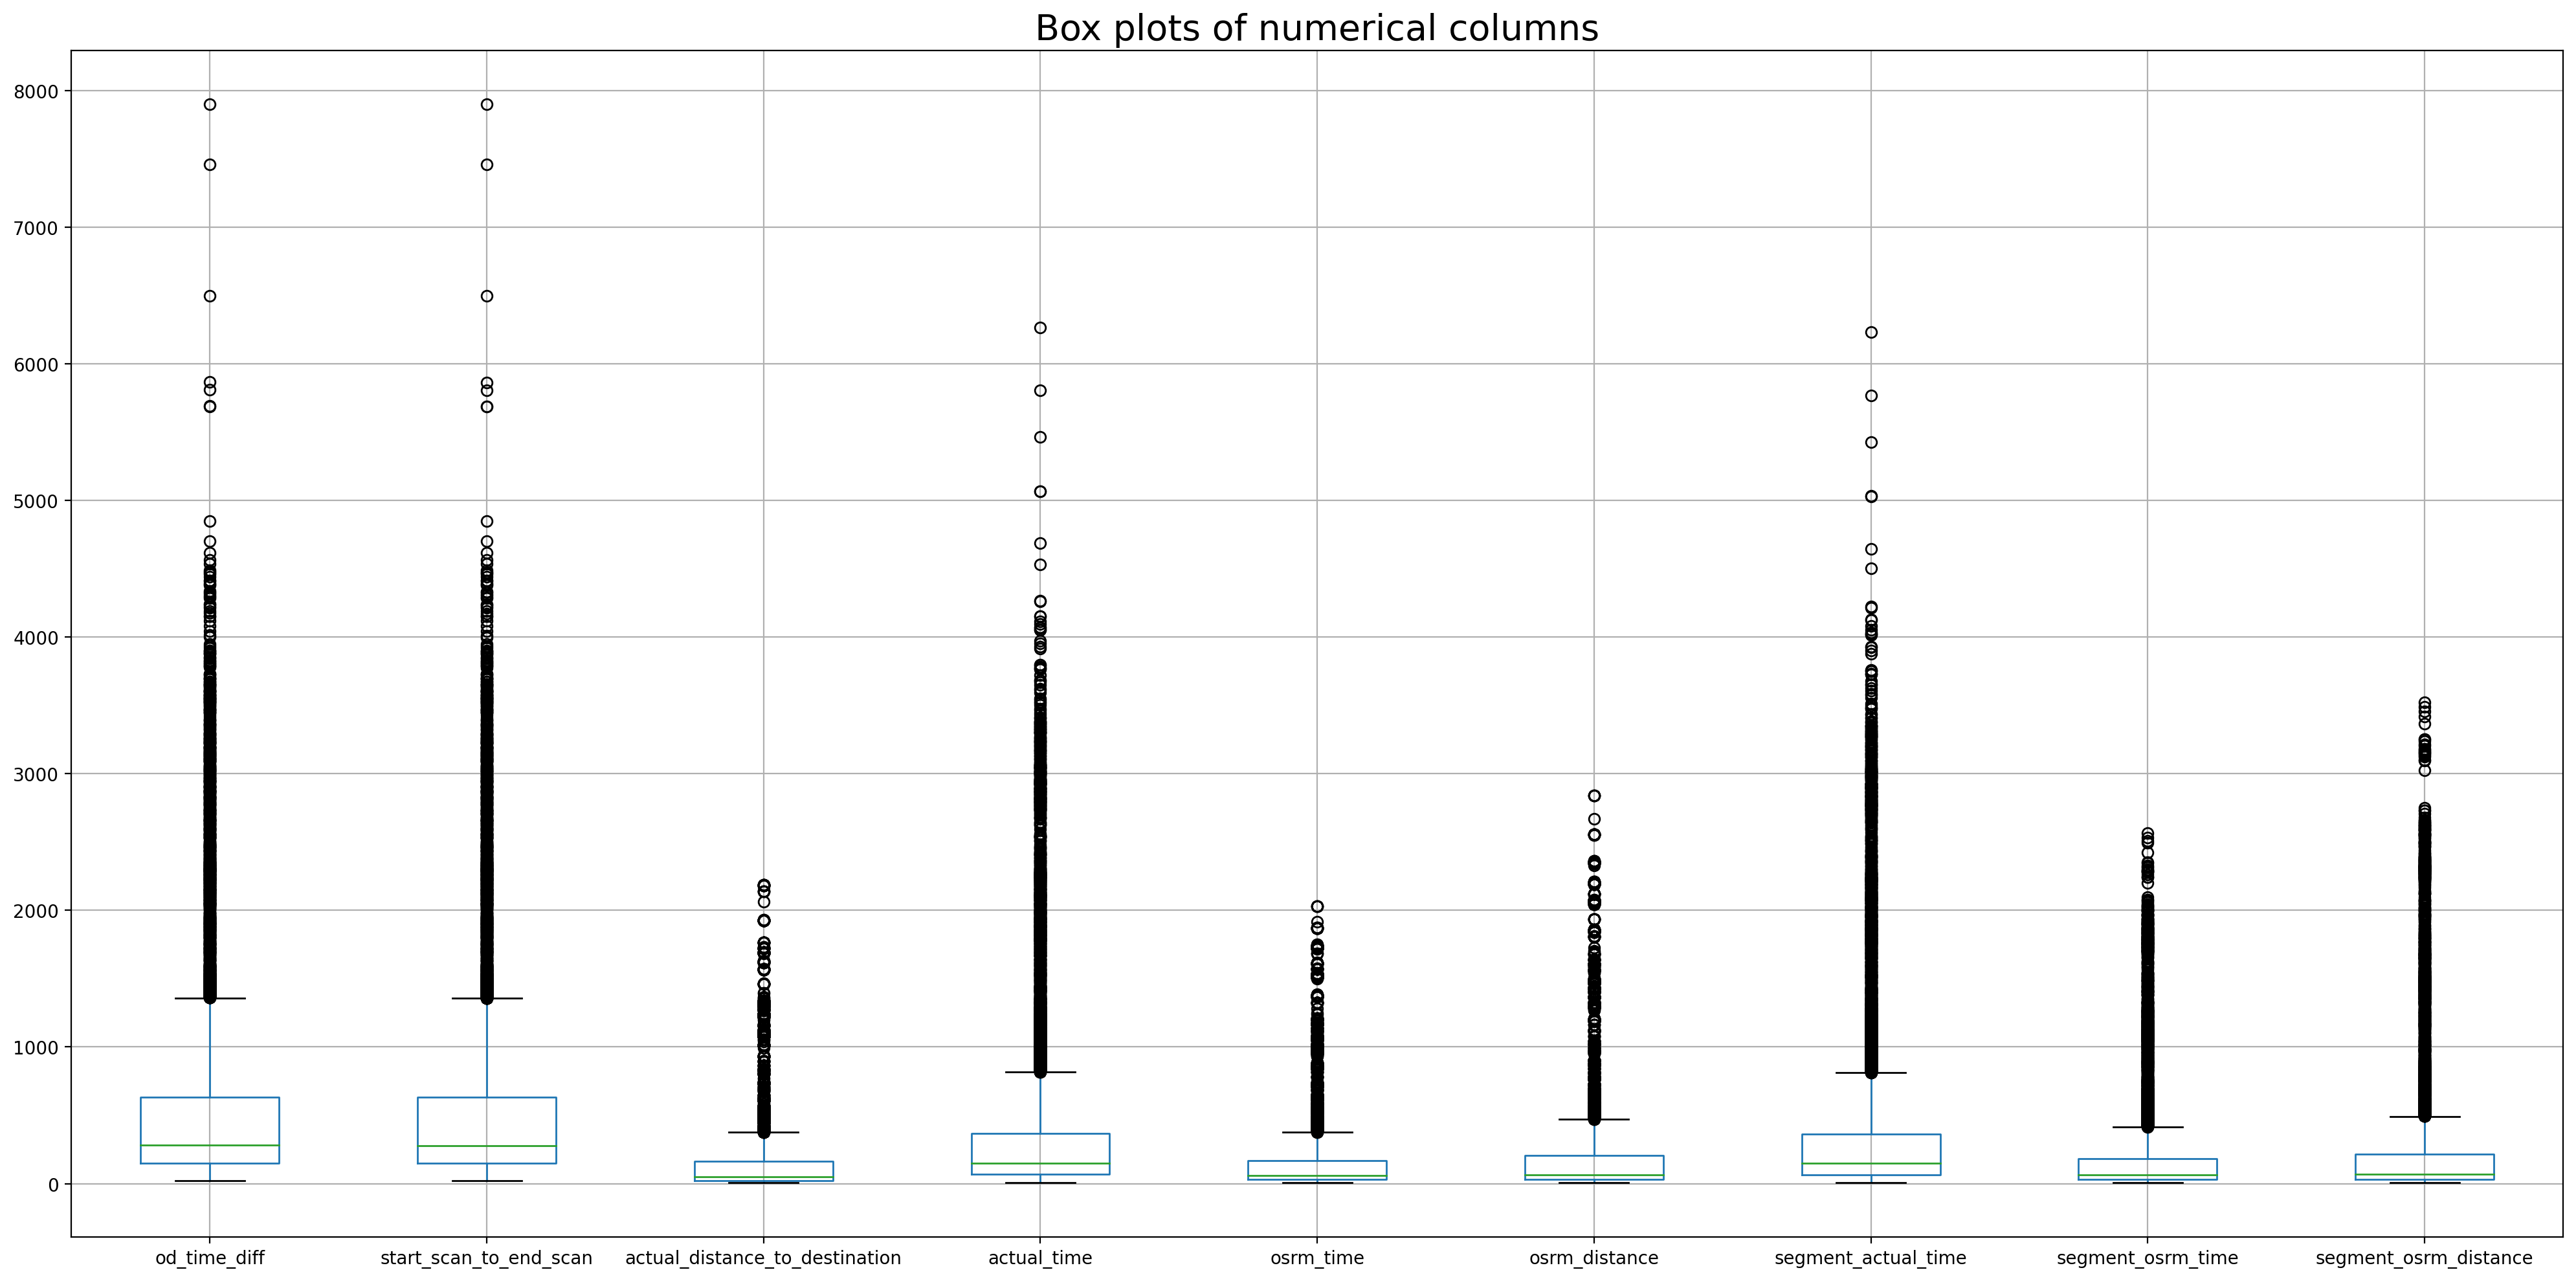

In [ ]:
# Setting up the canvas
plt.figure(figsize=(20,10), dpi=200)

# Plotting commands
num_cols=[col for col in delhivery_trip_level.columns if delhivery_trip_level[col].dtype=='float64']
delhivery_trip_level[num_cols].boxplot()

# Titles
plt.title('Box plots of numerical columns', size=20)

# Labels
#plt.xticks(rotation=10)

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

In [ ]:
Q1=delhivery_trip_level[num_cols].quantile(0.25)
Q3=delhivery_trip_level[num_cols].quantile(0.75)

IQR = Q3-Q1

In [ ]:
delhivery_trip_level=delhivery_trip_level.loc[~((delhivery_trip_level[num_cols] < Q1-1.5*IQR) | (delhivery_trip_level[num_cols] > Q3+1.5*IQR)).any(axis=1)]
delhivery_trip_level=delhivery_trip_level.reset_index(drop=True)
delhivery_trip_level.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_state,source_city,source_place,source_code,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,od_end_time,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur,Veersagr,I,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D,2018-09-12 03:01:59.598855,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
1,training,2018-09-12 00:01:00.113710,2018,9,12,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Mumbai Hub,No code,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Maharashtra,Mumbai,MiraRd,IP,2018-09-12 01:41:29.809822,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
2,training,2018-09-12 00:02:09.740725,2018,9,12,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,2018-09-12 12:00:30.683231,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
3,training,2018-09-12 00:02:34.161600,2018,9,12,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),Tamil Nadu,Chennai,Porur,No code,IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),Tamil Nadu,Chennai,Sriperumbudur,Dc,2018-09-12 03:13:03.432532,190.49,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
4,training,2018-09-12 00:04:22.011653,2018,9,12,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),Tamil Nadu,Chennai,Chrompet,No code,IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),Tamil Nadu,Chennai,Vandalur,Dc,2018-09-12 01:42:22.349694,98.01,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184


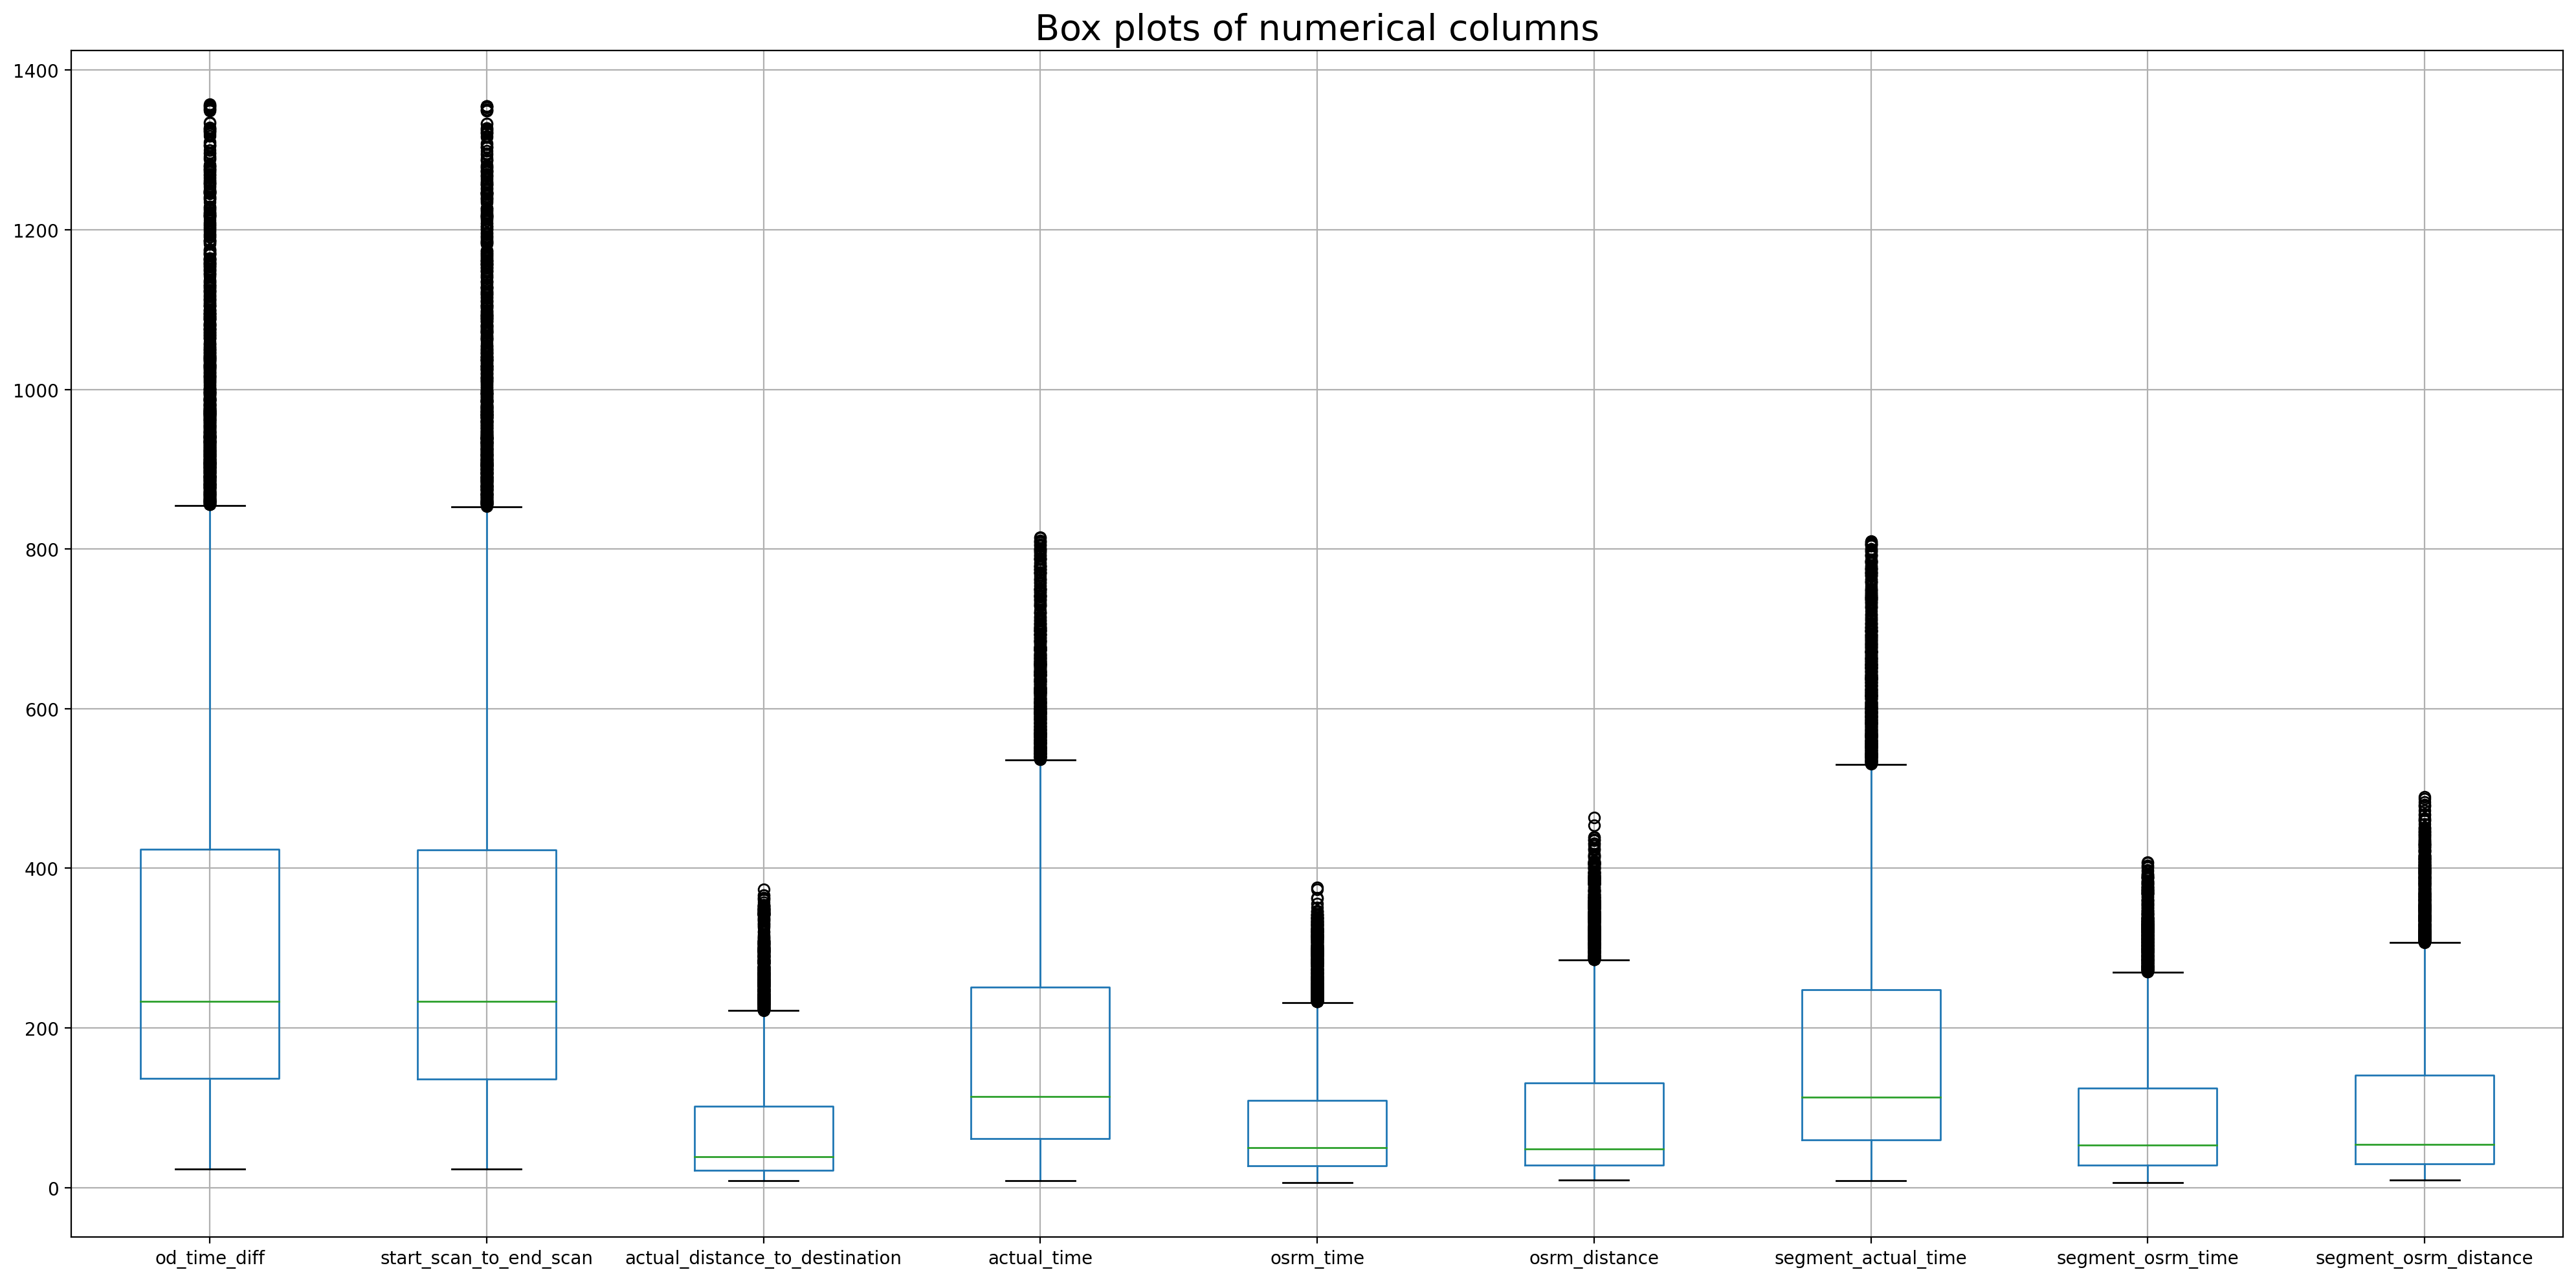

In [ ]:
# Setting up the canvas
plt.figure(figsize=(20,10), dpi=200)

# Plotting commands
delhivery_trip_level[num_cols].boxplot()

# Titles
plt.title('Box plots of numerical columns', size=20)

# Labels
#plt.xticks(rotation=10)

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

In [ ]:
print(f"start Date: {delhivery_trip_level['trip_creation_time'].dt.date.min()}")
print(f"End Date: {delhivery_trip_level['trip_creation_time'].dt.date.max()}")

start Date: 2018-09-12
End Date: 2018-10-03


## **UNIVARIATE ANALYSIS**

Univariate analysis is the simplest form of analyzing data where we examine each variable individually. The goal is to summarize and find patterns in the data for each variable. This analysis helps us understand the distribution, central tendency, and variability of individual features. For our dataset, we will conduct univariate analysis on both categorical and numerical variables to uncover insights.

<Figure size 1280x960 with 0 Axes>

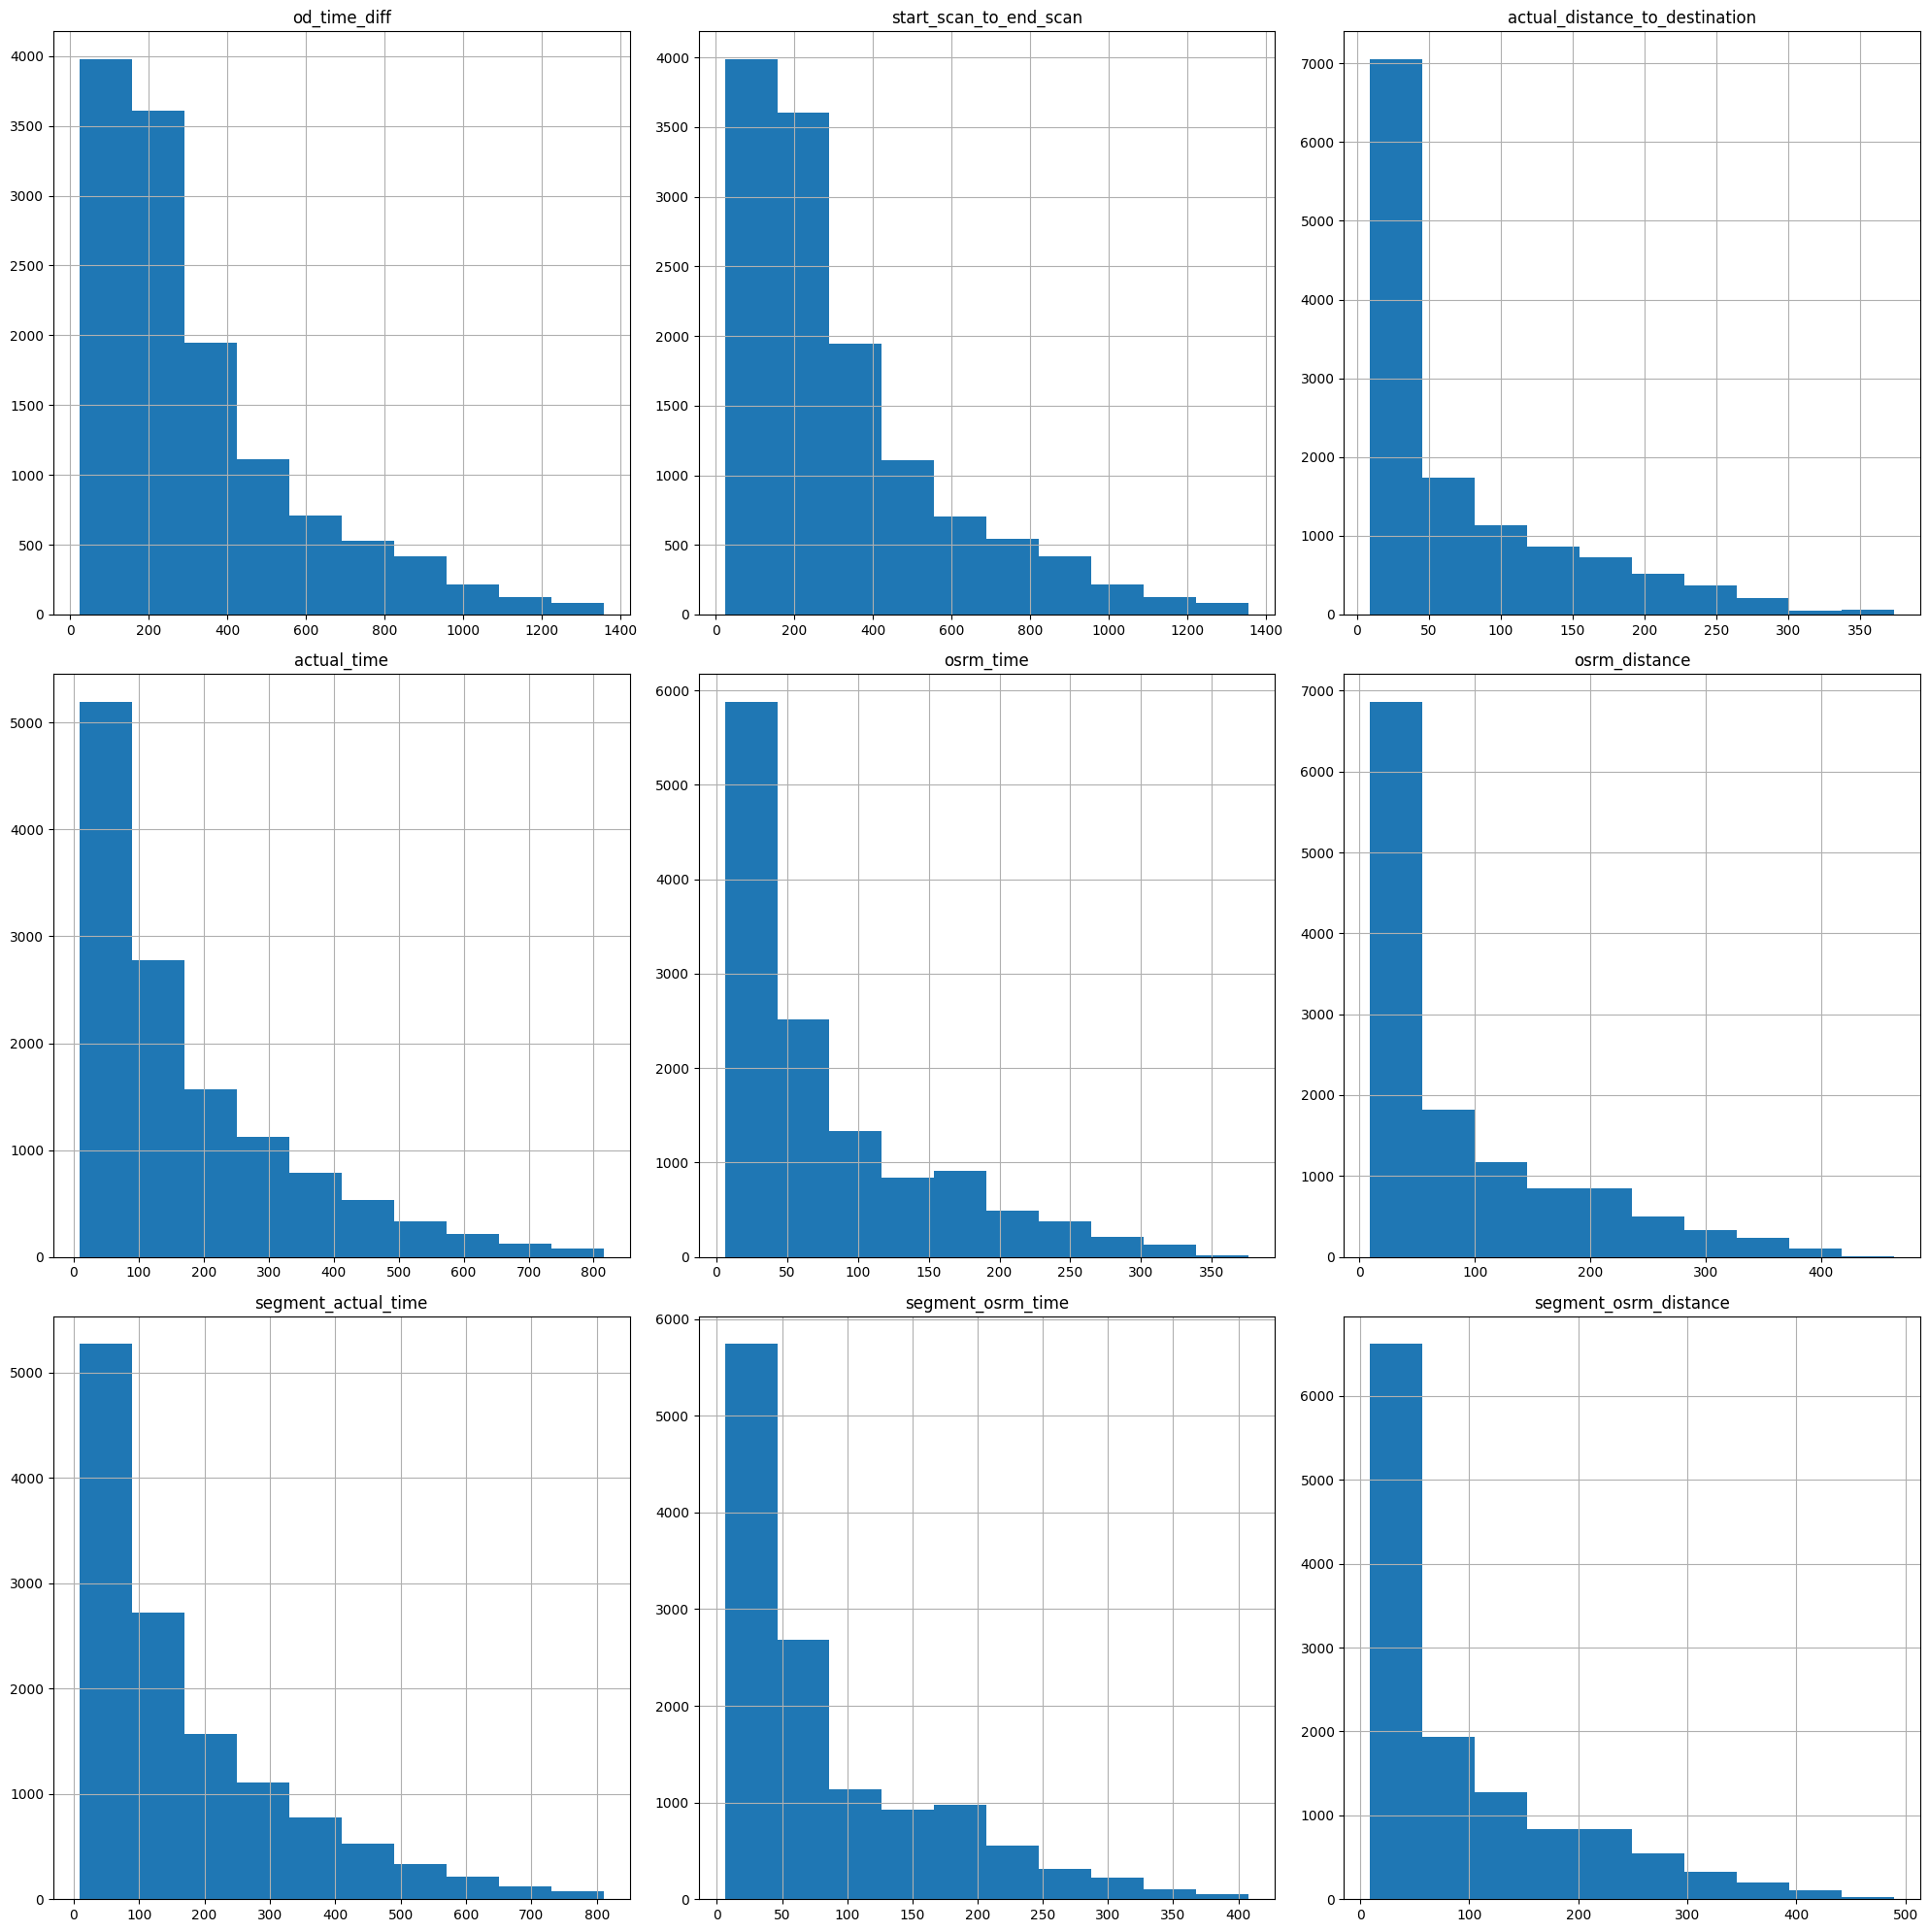

In [ ]:
# Setting up the canvas
plt.figure(dpi=200)

# Plotting commands
delhivery_trip_level[num_cols].hist(figsize=(20,20))

# Titles
#plt.title('Box plots of numerical columns', size=20)

# Labels
#plt.xticks(rotation=10)

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

In [ ]:
delhivery_trip_level.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_state,source_city,source_place,source_code,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,od_end_time,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur,Veersagr,I,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D,2018-09-12 03:01:59.598855,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
1,training,2018-09-12 00:01:00.113710,2018,9,12,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Mumbai Hub,No code,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Maharashtra,Mumbai,MiraRd,IP,2018-09-12 01:41:29.809822,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
2,training,2018-09-12 00:02:09.740725,2018,9,12,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,2018-09-12 12:00:30.683231,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
3,training,2018-09-12 00:02:34.161600,2018,9,12,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),Tamil Nadu,Chennai,Porur,No code,IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),Tamil Nadu,Chennai,Sriperumbudur,Dc,2018-09-12 03:13:03.432532,190.49,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
4,training,2018-09-12 00:04:22.011653,2018,9,12,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),Tamil Nadu,Chennai,Chrompet,No code,IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),Tamil Nadu,Chennai,Vandalur,Dc,2018-09-12 01:42:22.349694,98.01,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184


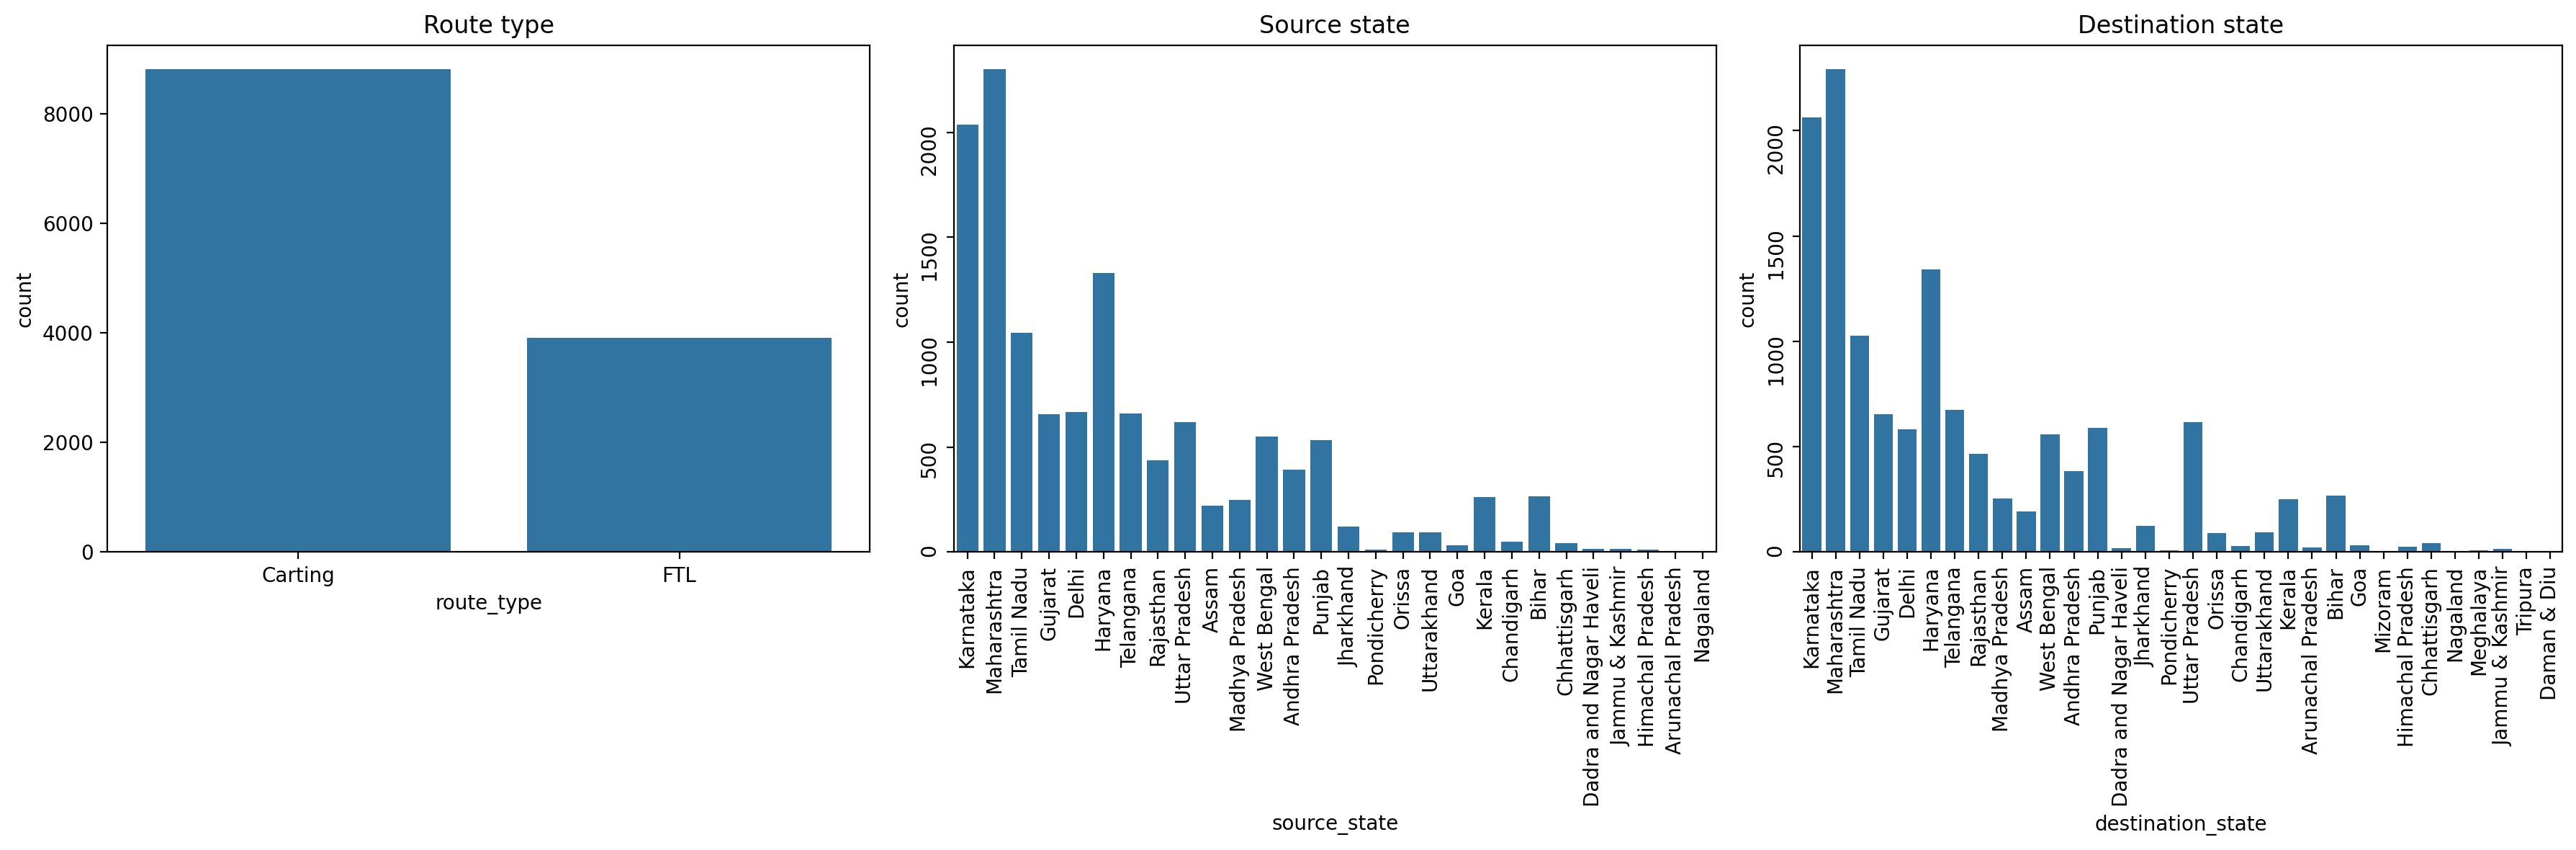

In [ ]:
# Setting up the canvas
fig,axs=plt.subplots(ncols=3, nrows=1, figsize=(18,6), dpi=200)

# Plotting commands
sns.countplot(data=delhivery_trip_level, x='route_type', ax=axs[0])
sns.countplot(data=delhivery_trip_level, x='source_state', ax=axs[1])
sns.countplot(data=delhivery_trip_level, x='destination_state', ax=axs[2])

# Titles
axs[0].set_title('Route type')
axs[1].set_title('Source state')
axs[2].set_title('Destination state')

# Labels
axs[1].tick_params(rotation=90)
axs[2].tick_params(rotation=90)

# Adjusting the canvas
plt.tight_layout()

# Display
plt.show()

The dataset reveals two primary route types: **Carting** and **FTL (Full Truck Load)**. Carting is used more frequently, with over 9,000 trips, compared to FTL's below 4,000 trips. Analyzing the source and destination states, Maharashtra, Karnataka, and Haryana emerge as the top three states for both trip origins and destinations, indicating high logistics activity. In contrast, Nagaland and Arunachal Pradesh have the fewest trips originating, while Daman & Diu and Tripura are the least common destinations.

This significant difference in route types and regional logistics activity highlights areas where Delhivery can optimize its operations, focusing on high-activity regions for efficiency improvements and addressing challenges in lower-activity areas. Visual analysis further underscores these patterns, providing actionable insights for strategic decision-making.

### **Hypothesis Testing: Comparing Actual Values and OSRM-Generated Values**

To validate the accuracy and reliability of the dataset, hypothesis testing using the t-test was employed to check the relationship between the actual values and the OSRM-generated values. The t-test helps in determining whether there is a statistically significant difference between the means of the actual trip times and distances compared to those generated by the OSRM routing engine. This analysis is crucial for assessing the performance and precision of the OSRM tool in predicting realistic logistics metrics and identifying potential discrepancies that could affect operational decisions and forecasting models.

In [ ]:
from scipy.stats import ttest_ind

h0='There is no significant difference between actual time and OSRM time.' # Ma=Mb
h1='Actual time is greaterthan OSRM time.' # Ma>Mb

a=delhivery_trip_level['actual_time']
b=delhivery_trip_level['osrm_time']

t_stat,p_value=ttest_ind(a,b,alternative='greater')

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Reject h0 i.e., Actual time is greaterthan OSRM time.


###Comparing actual time and OSRM time

To assess the relationship between the actual time taken for deliveries and the time estimated by the OSRM routing engine, a hypothesis test was conducted using a t-test. The null hypothesis (H0) stated that there is no significant difference between the actual time and OSRM time. The alternative hypothesis (H1) posited that the actual time is greater than the OSRM time.

Upon performing the t-test, the p-value was found to be less than the significance level (alpha = 0.05). Consequently, the null hypothesis was rejected in favor of the alternative hypothesis. This result indicates that the actual time taken for deliveries is significantly greater than the time estimated by the OSRM routing engine.

In [ ]:
from scipy.stats import ttest_ind

h0='There is no significant difference between actual distance to destination and OSRM distance.' # Ma=Mb
h1='Actual distance to destination is lessthan OSRM distance.' # Ma<Mb

a=delhivery_trip_level['actual_distance_to_destination']
b=delhivery_trip_level['osrm_distance']

t_stat,p_value=ttest_ind(a,b,alternative='less')

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Reject h0 i.e., Actual distance to destination value is lessthan OSRM distance aggregated value.


### Comparing Actual Distance and OSRM-Generated Distance

To evaluate the relationship between the actual distance traveled to the destination and the distance estimated by the OSRM routing engine, a hypothesis test was conducted using a t-test. The null hypothesis (H0) stated that there is no significant difference between the actual distance to the destination and the OSRM distance. The alternative hypothesis (H1) posited that the actual distance to the destination is less than the OSRM distance.

Upon performing the t-test, the p-value was found to be less than the significance level (alpha = 0.05). Consequently, the null hypothesis was rejected in favor of the alternative hypothesis. This result indicates that the actual distance to the destination is significantly less than the distance estimated by the OSRM routing engine.

In [ ]:
from scipy.stats import ttest_ind

h0='There is no significant difference between segment actual time and segment OSRM time.' # Ma=Mb
h1='Segment actual time is greaterthan segment OSRM time.' # Ma>Mb

a=delhivery_trip_level['segment_actual_time']
b=delhivery_trip_level['segment_osrm_time']

t_stat,p_value=ttest_ind(a,b,alternative='greater')

alpha=0.05

if p_value < alpha:
    print(f"Reject h0 i.e., {h1}")
else:
    print(f"Failed to reject h0 i.e., {h0}")

Reject h0 i.e., Segment actual time is greaterthan segment OSRM time.


### Comparing Segment Actual Time and Segment OSRM Time

To assess the difference between the segment actual time and the segment OSRM time, a hypothesis test was carried out using a t-test. The null hypothesis (H0) stated that there is no significant difference between the segment actual time and the segment OSRM time. The alternative hypothesis (H1) proposed that the segment actual time is greater than the segment OSRM time.

The results of the t-test showed that the p-value was below the significance level (alpha = 0.05). As a result, the null hypothesis was rejected, supporting the alternative hypothesis. This indicates that the segment actual time is significantly greater than the segment OSRM time.

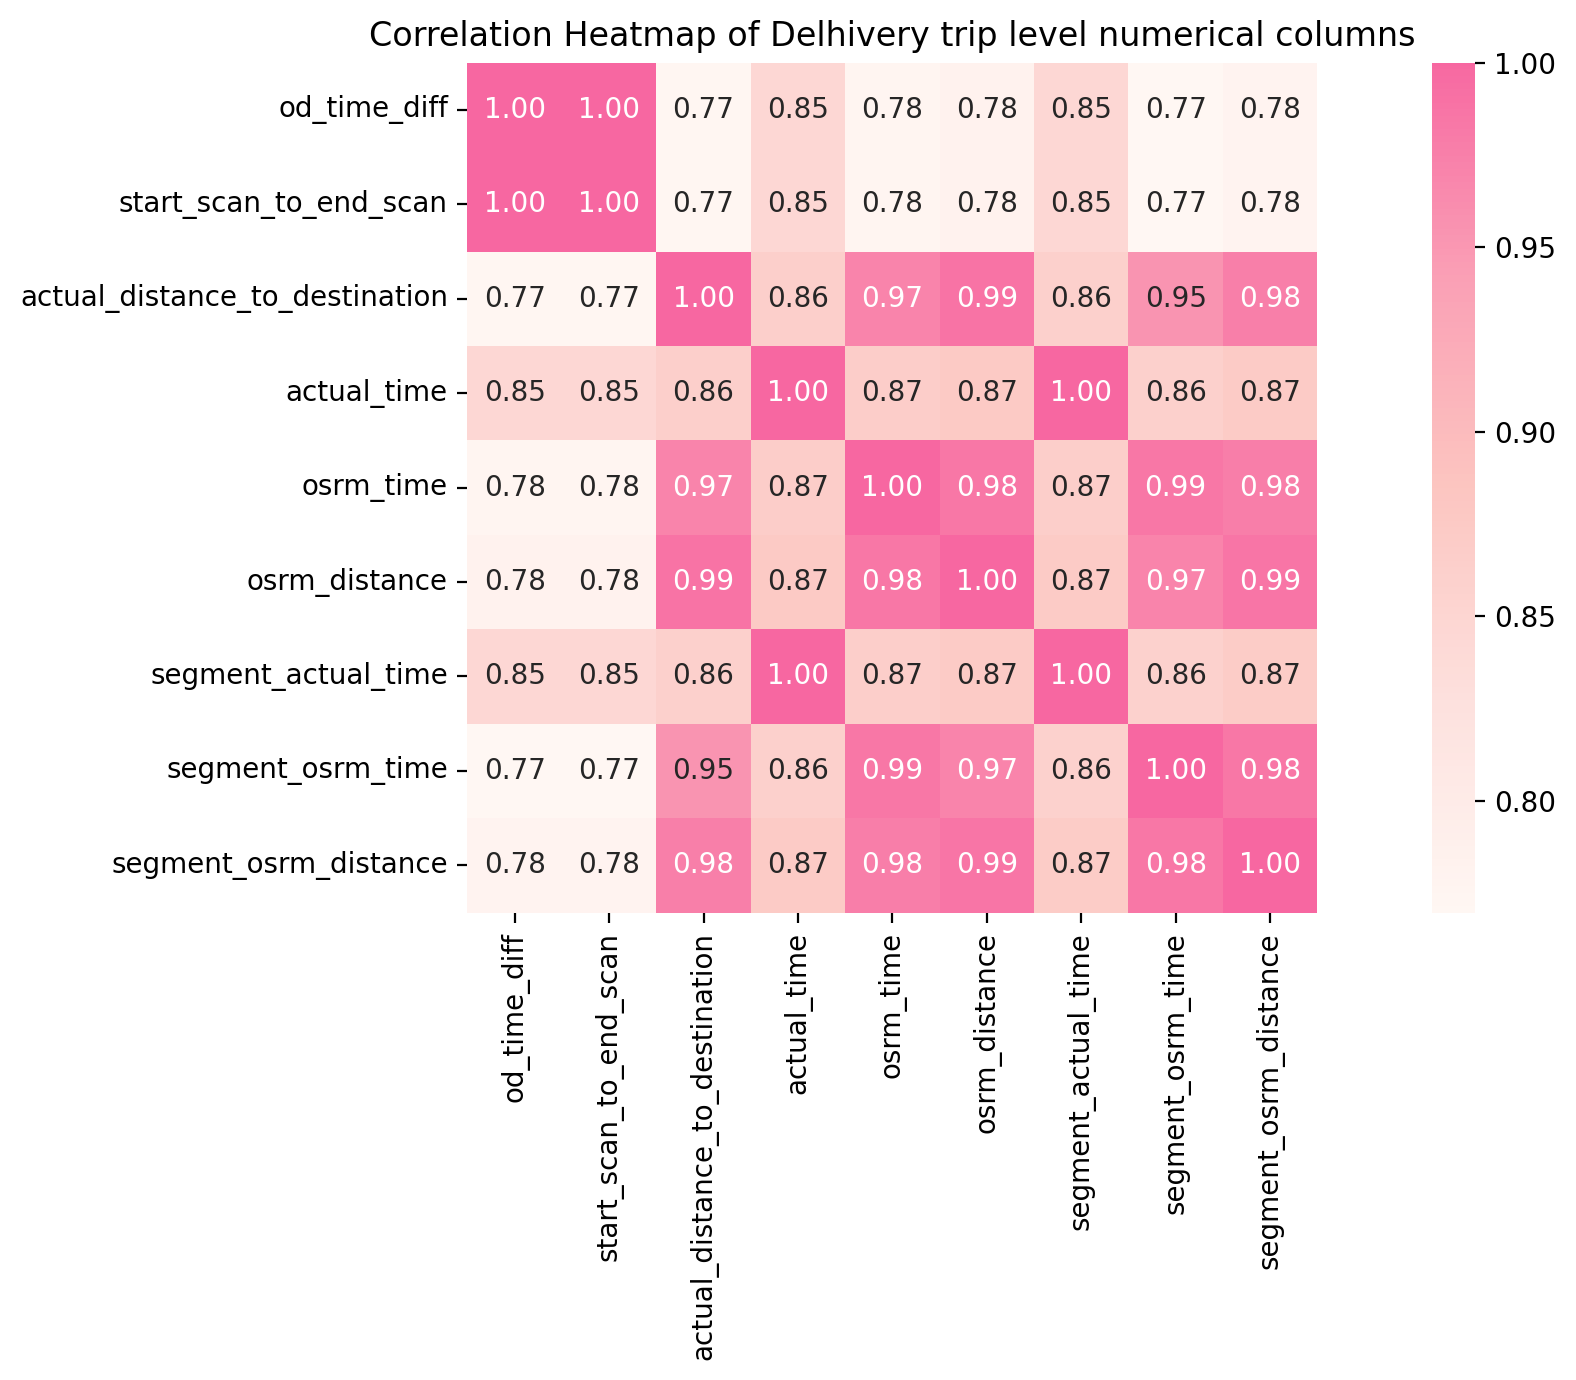

In [ ]:
# Setting up the canvas
plt.figure(figsize=(12,7), dpi=200)

# PLoting
sns.heatmap(delhivery_trip_level[num_cols].corr(method='spearman'), annot=True, center=True, cmap='RdPu', square=True, fmt='.2f')

# Title
plt.title('Correlation Heatmap of Delhivery trip level numerical columns')

# Adjusting the plot
plt.tight_layout()

# Display the plot
plt.show()

The results from the hypothesis testing and correlation analysis using the Spearman method provide a comprehensive understanding of the relationship between actual and OSRM estimates in delivery logistics. Hypothesis testing revealed that the actual time is significantly greater than the OSRM time, the actual distance to the destination is significantly less than the OSRM distance, and the segment actual time is significantly greater than the segment OSRM time. These findings indicate consistent but systematic deviations between actual measurements and OSRM estimates.

The correlation analysis supports these conclusions, demonstrating extremely high correlations between actual and OSRM measurements across times and distances. For instance, `actual_time` and `segment_actual_time` nearly perfectly correlate, suggesting the aggregation of segment times is reflective of total trip times. Furthermore, the near-perfect correlation between `od_time_diff` and `start_scan_to_end_scan` underscores the relationship between the overall trip duration and scan-to-scan durations. Despite the high correlations showing consistency in the dataset, the hypothesis testing underscores significant differences.

In [ ]:
delhivery_trip_level.head()

,data,trip_creation_time,trip_creation_year,trip_creation_month,trip_creation_day,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,source_state,source_city,source_place,source_code,destination_center,destination_name,destination_state,destination_city,destination_place,destination_code,od_end_time,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,training,2018-09-12 00:00:22.886430,2018,9,12,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),Karnataka,Tumkur,Veersagr,I,IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),Karnataka,Chikblapur,ShntiSgr,D,2018-09-12 03:01:59.598855,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
1,training,2018-09-12 00:01:00.113710,2018,9,12,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),Maharashtra,Mumbai,Mumbai Hub,No code,IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),Maharashtra,Mumbai,MiraRd,IP,2018-09-12 01:41:29.809822,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
2,training,2018-09-12 00:02:09.740725,2018,9,12,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,IND583101AAA,Bellary_Dc (Karnataka),Karnataka,Bellary,Bellary,Dc,2018-09-12 12:00:30.683231,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
3,training,2018-09-12 00:02:34.161600,2018,9,12,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,trip-153671055416136166,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),Tamil Nadu,Chennai,Porur,No code,IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),Tamil Nadu,Chennai,Sriperumbudur,Dc,2018-09-12 03:13:03.432532,190.49,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
4,training,2018-09-12 00:04:22.011653,2018,9,12,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,trip-153671066201138152,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),Tamil Nadu,Chennai,Chrompet,No code,IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),Tamil Nadu,Chennai,Vandalur,Dc,2018-09-12 01:42:22.349694,98.01,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184


### Data Preprocessing for Machine Learning

To prepare your dataset for machine learning, the process must begin with thorough preprocessing. Initially, this involves selecting the necessary features from the complete dataset, focusing on those elements that will be most predictive for your models. Following this, it's crucial to convert categorical columns into numeric formats. Techniques such as one-hot encoding can be applied to transform these categories into a machine-readable format that effectively represents the original data distinctions.

In [ ]:
delhivery_trip_model=delhivery_trip_level[[ 'route_type', 'od_time_diff', 'start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']]

delhivery_trip_model.head()

,route_type,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,Carting,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
1,Carting,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
2,FTL,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
3,Carting,190.49,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
4,Carting,98.01,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184


In [ ]:
delhivery_trip_model.loc[:,'route_type']=delhivery_trip_model['route_type'].map({'Carting':1, 'FTL':0})

delhivery_trip_model.head()

,route_type,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,1,181.61,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894
1,1,100.49,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766
2,0,718.34,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919
3,1,190.49,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647
4,1,98.01,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184


Once categorical data is effectively encoded, you should address the numerical features. Scaling or normalizing these data points ensures that the dataset has a consistent range and format. You can employ various scaling methods, such as MinMaxScaler to adjust the data within a bounded range or StandardScaler to normalize the data around the mean with unit variance. These steps not only help in maintaining uniformity across different scales but also enhance the performance and convergence speed of machine learning algorithms that are sensitive to feature scaling, such as those involving gradient descent optimizations. Proper preprocessing is essential for leveraging the full potential of the data and ensuring that the machine learning model is accurate and efficient.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(delhivery_trip_model)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(delhivery_trip_model)

In [ ]:
pd.DataFrame(standardized_data, columns= delhivery_trip_model.columns)

,route_type,od_time_diff,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,0.666203,-0.544846,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.262662,-0.145358
1,0.666203,-0.861875,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.878225,-0.823653
2,-1.501044,1.552776,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.365464,0.514899
3,0.666203,-0.510142,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.790288,-0.737295
4,0.666203,-0.871568,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.915913,-0.906532
...,...,...,...,...,...,...,...,...,...,...
12718,0.666203,-0.246185,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.300349,-0.349273
12719,0.666203,-1.017811,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.941038,-0.863608
12720,0.666203,0.395104,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.026276,0.072932
12721,0.666203,0.107464,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.697092,1.324267


### Insights and Recommendations from Logistics Data Analysis

#### Insights:
1. **Route Utilization Differences:** The dataset shows a significant disparity in the utilization of different route types. Carting is used more frequently than Full Truck Load (FTL), indicating a preference for smaller, more frequent deliveries.

2. **Regional Logistics Activity:** Key logistics hubs identified during this timeframe include Maharashtra, Karnataka, and Haryana, with high activity in both trip origins and destinations. In stark contrast, regions like Nagaland and Arunachal Pradesh, and also Daman & Diu and Tripura, demonstrate minimal logistical operations.

3. **Discrepancies Between Estimated and Actual Metrics:** Systematic deviations were observed where actual logistics times are consistently higher than estimated by OSRM, while the traveled distances are less than predicted. These discrepancies highlight challenges in estimation accuracy.

#### Recommendations:
1. **Optimization of Route Types:** With Carting being predominant, there is room for enhancing these operations. Potential strategies include improving route planning, increasing trip frequencies, and investing in technologies to streamline deliveries. Analyzing underutilization in FTL could unveil opportunities for improvement.

2. **Focus on High-Activity Regions:** Targeted enhancements in logistics hubs such as Maharashtra, Karnataka, and Haryana could include upgraded warehouse facilities and improved fleet management, tailored to meet the high demand observed in these areas.

3. **Addressing Low-Activity Regions:** Conducting detailed market analysis in low-activity states can identify barriers—be it market conditions, infrastructural deficiencies, or regulatory hurdles. Strategic interventions might be necessary to stimulate logistics activity in these regions.

4. **Adjusting to Discrepancies in Estimates vs. Actuals:** It is crucial for Delhivery to address the root causes of the observed discrepancies between the OSRM estimates and actual metrics. Adjusting OSRM parameters, incorporating more localized data, or creating customized models could enhance accuracy.

**Limitations of the Analysis:** The dataset covers a relatively short timeframe, which may not capture all cyclic and seasonal variations in logistics patterns. This limitation should be considered when generalizing findings and could affect the precision and applicability of recommendations. Continued data collection and analysis over longer periods are recommended to validate these insights.

By addressing these areas, Delhivery can not only boost efficiency but also better adapt to regional demands and evolving market conditions.